# Introduction to Descriptive Statistical Analysis

This notebook presents an extensive statistical evaluation and graphical examination of a health-related dataset. Our primary objective is to extract meaningful conclusions regarding the dataset's inherent characteristics, uncover underlying patterns, and comprehend the interrelationships among various attributes, specifically concerning disease classification. We will achieve this through foundational descriptive statistical methods and a diverse array of data visualization techniques.

In [1]:
import pandas as data_frame_ops
import numpy as numerical_ops
import matplotlib.pyplot as plotting
import seaborn as enhanced_plotting
from scipy import stats
import math
from IPython.display import display # For cleaner notebook output

import warnings
warnings.filterwarnings('ignore') # Suppressing warnings for cleaner output

# Customizing visualization settings
enhanced_plotting.set_style('whitegrid')
plotting.rcParams['figure.figsize'] = (12, 8) # Setting a default figure size
plotting.rcParams['font.size'] = 12 # Adjusting default font size

## Data Loading and Initial Structure Inspection

We commence by loading the renowned Wisconsin Breast Cancer Diagnostic (WBCD) dataset. This dataset is a popular benchmark in machine learning for binary classification tasks. Our initial steps involve retrieving the data, assigning meaningful column headers, and then performing a preliminary examination of its structure, including the first few records and data types, to gain an immediate understanding.

In [2]:
# Source URL for the dataset
data_source_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Defining a comprehensive list of feature names for clarity
feature_descriptions = {
    0: 'Record_ID', 1: 'Diagnosis_Result',
    **{i: f'Feature_Mean_{i-1}' for i in range(2, 12)},
    **{i: f'Feature_SE_{i-11}' for i in range(12, 22)},
    **{i: f'Feature_Worst_{i-21}' for i in range(22, 32)}
}
column_names = [feature_descriptions[i] for i in range(32)]

# Loading the raw data into a data_frame_ops DataFrame
health_data_df = data_frame_ops.read_csv(data_source_link, names=column_names, na_values='?')

# Presenting the initial five entries of the loaded data
print("\nFirst 5 rows of the dataset:")
display(health_data_df.head())

# Displaying a concise summary of the DataFrame including data types and non-null counts
print("\nDetailed Dataset Overview:")
health_data_df.info()


First 5 rows of the dataset:


Record_ID Diagnosis_Result  Feature_Mean_1  Feature_Mean_2  Feature_Mean_3  \
0     842302                M           17.99           10.38          122.80   
1     842517                M           20.57           17.77          132.90   
2   84300903                M           19.69           21.25          130.00   
3   84348301                M           11.42           20.38           77.58   
4   84358402                M           20.29           14.34          135.10   

   Feature_Mean_4  Feature_Mean_5  Feature_Mean_6  Feature_Mean_7  \
0          1001.0         0.11840         0.27760          0.3001   
1          1326.0         0.08474         0.07864          0.0869   
2          1203.0         0.10960         0.15990          0.1974   
3           386.1         0.14250         0.28390          0.2414   
4          1297.0         0.10030         0.13280          0.1980   

   Feature_Mean_8  ...  Feature_Worst_1  Feature_Worst_2  Feature_Worst_3  \
0         0.14710  ...            25.38            17.33           184.60   
1         0.07017  ...            24.99            23.41           158.80   
2         0.12790  ...            23.57            25.53           152.50   
3         0.10520  ...            14.91            26.50            98.87   
4         0.10430  ...            22.54            16.67           152.20   

   Feature_Worst_4  Feature_Worst_5  Feature_Worst_6  Feature_Worst_7  \
0           2019.0           0.1622           0.6656           0.7119   
1           1956.0           0.1238           0.1866           0.2416   
2           1709.0           0.1444           0.4245           0.4504   
3            567.7           0.2098           0.8663           0.6869   
4           1575.0           0.1374           0.2050           0.4000   

   Feature_Worst_8  Feature_Worst_9  Feature_Worst_10  
0           0.2654           0.4601           0.11890  
1           0.1860           0.2750           0.08902  
2           0.2430           0.3613           0.08758  
3           0.2575           0.6638           0.17300  
4           0.1625           0.2364           0.07678  

[5 rows x 32 columns]


Detailed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Record_ID         569 non-null    int64  
 1   Diagnosis_Result  569 non-null    object 
 2   Feature_Mean_1    569 non-null    float64
 3   Feature_Mean_2    569 non-null    float64
 4   Feature_Mean_3    569 non-null    float64
 5   Feature_Mean_4    569 non-null    float64
 6   Feature_Mean_5    569 non-null    float64
 7   Feature_Mean_6    569 non-null    float64
 8   Feature_Mean_7    569 non-null    float64
 9   Feature_Mean_8    569 non-null    float64
 10  Feature_Mean_9    569 non-null    float64
 11  Feature_Mean_10   569 non-null    float64
 12  Feature_SE_1      569 non-null    float64
 13  Feature_SE_2      569 non-null    float64
 14  Feature_SE_3      569 non-null    float64
 15  Feature_SE_4      569 non-null    float64
 16  Feature_SE_5    

## Examination of Missing Data Points

A vital preliminary step in any data analysis workflow is to ascertain the presence and extent of missing values. Undetected or mishandled missing data can lead to skewed statistical results and compromise the integrity of subsequent modeling efforts. We will therefore conduct a thorough check for any null or undefined entries across all attributes within our dataset.

In [3]:
print("\nTotal count of missing values for each feature:")
display(health_data_df.isnull().sum())


Total count of missing values for each feature:


Record_ID           0
Diagnosis_Result    0
Feature_Mean_1      0
Feature_Mean_2      0
Feature_Mean_3      0
Feature_Mean_4      0
Feature_Mean_5      0
Feature_Mean_6      0
Feature_Mean_7      0
Feature_Mean_8      0
Feature_Mean_9      0
Feature_Mean_10     0
Feature_SE_1        0
Feature_SE_2        0
Feature_SE_3        0
Feature_SE_4        0
Feature_SE_5        0
Feature_SE_6        0
Feature_SE_7        0
Feature_SE_8        0
Feature_SE_9        0
Feature_SE_10       0
Feature_Worst_1     0
Feature_Worst_2     0
Feature_Worst_3     0
Feature_Worst_4     0
Feature_Worst_5     0
Feature_Worst_6     0
Feature_Worst_7     0
Feature_Worst_8     0
Feature_Worst_9     0
Feature_Worst_10    0
dtype: int64

## Describing the 'Average': Measures of Central Tendency

Measures of central tendency provide a single value that attempts to describe a set of data by identifying the central position within that set. These metrics are fundamental for grasping the typical magnitude of observations in a distribution. We will compute and visualize the arithmetic mean, median, mode, and an example of a weighted mean for a subset of our dataset's key quantitative features, followed by their interpretation.


Key Central Tendency Statistics for Feature_Mean_1:
  Mean (Average): 14.1273
  Median (Middle Value): 13.3700
  Mode (Most Frequent): 12.3400
  Weighted Mean: 15.0547


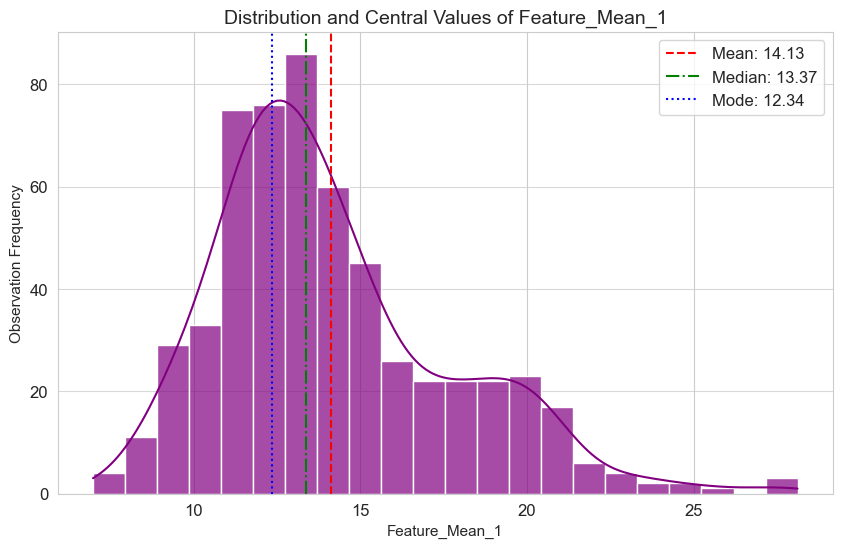


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_2:
  Mean (Average): 19.2896
  Median (Middle Value): 18.8400
  Mode (Most Frequent): 14.9300
  Weighted Mean: 19.6364


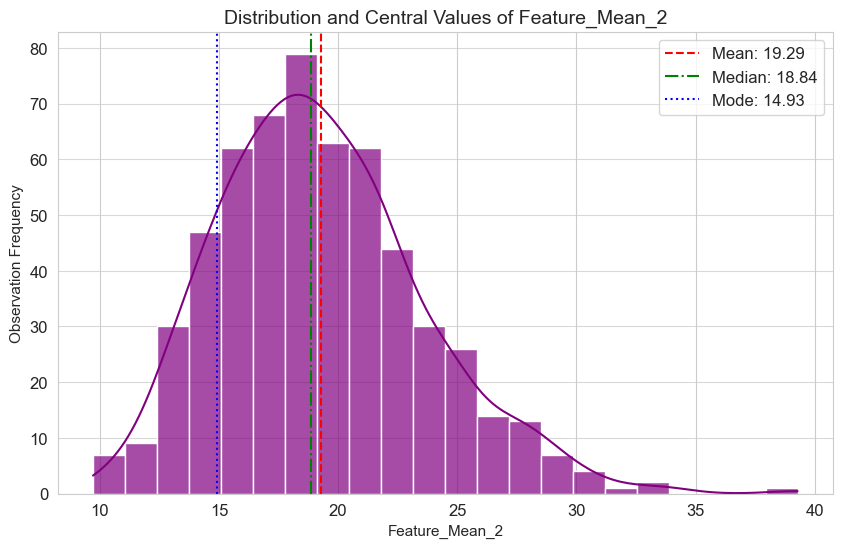


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_3:
  Mean (Average): 91.9690
  Median (Middle Value): 86.2400
  Mode (Most Frequent): 82.6100
  Weighted Mean: 98.0068


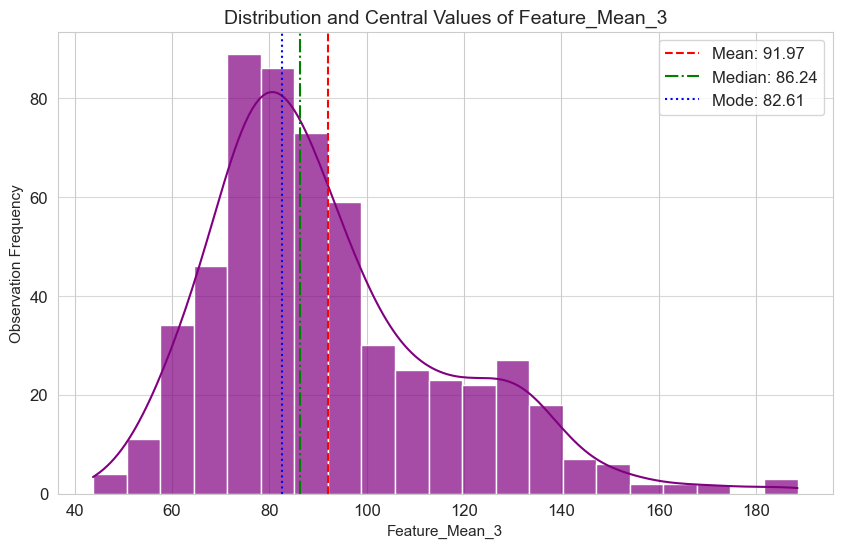


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_4:
  Mean (Average): 654.8891
  Median (Middle Value): 551.1000
  Mode (Most Frequent): 512.2000
  Weighted Mean: 741.4118


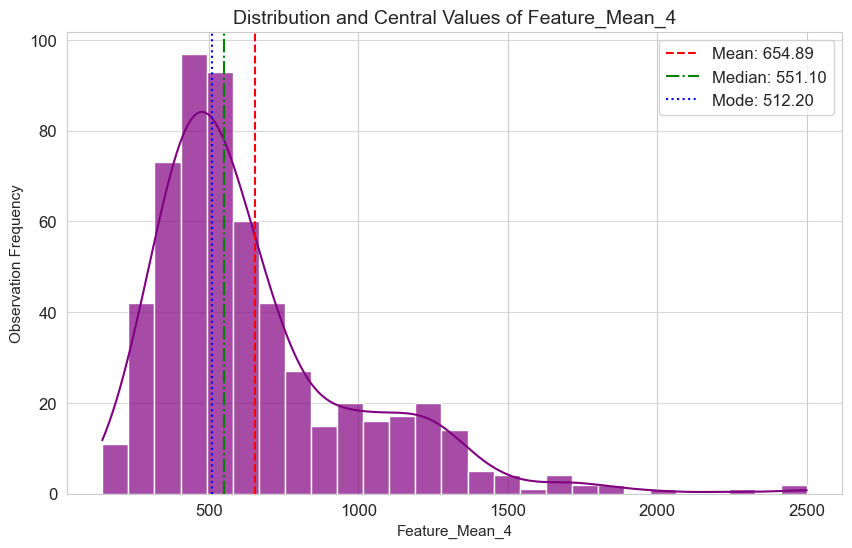


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_5:
  Mean (Average): 0.0964
  Median (Middle Value): 0.0959
  Mode (Most Frequent): 0.1007
  Weighted Mean: 0.0970


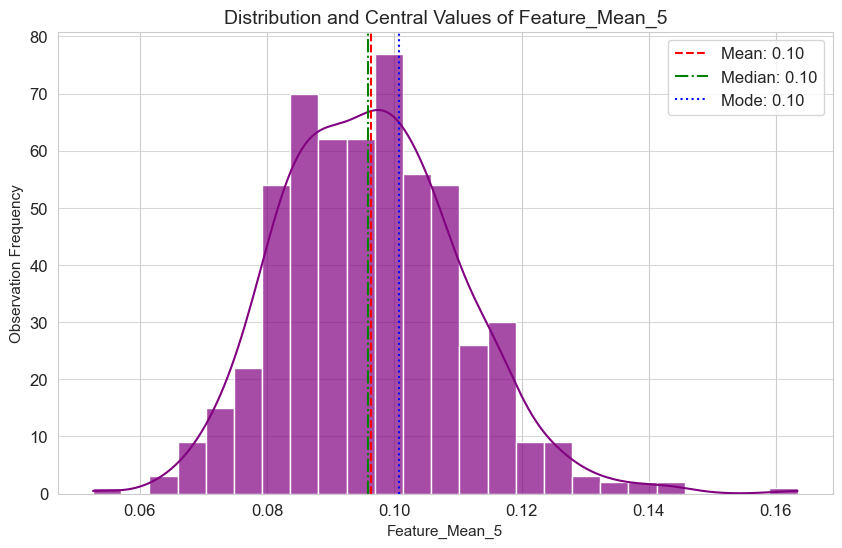


Interpretation of Central Tendency:
  The mean and median are closely aligned, suggesting a symmetric distribution.



Key Central Tendency Statistics for Feature_Mean_6:
  Mean (Average): 0.1043
  Median (Middle Value): 0.0926
  Mode (Most Frequent): 0.1147
  Weighted Mean: 0.1110


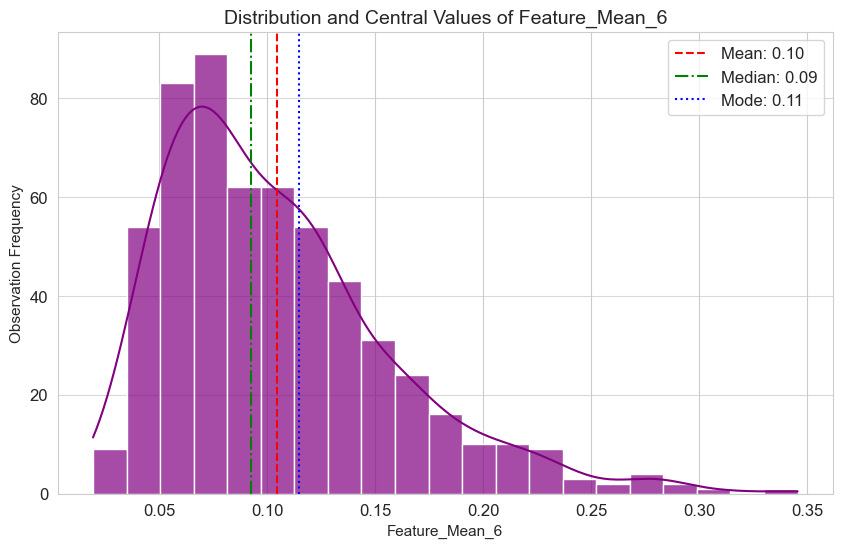


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_7:
  Mean (Average): 0.0888
  Median (Middle Value): 0.0615
  Mode (Most Frequent): 0.0000
  Weighted Mean: 0.1022


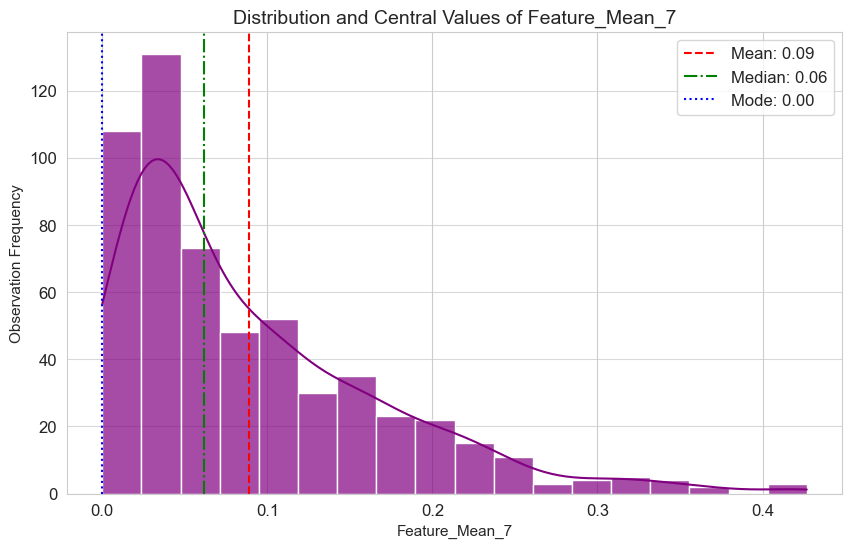


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_8:
  Mean (Average): 0.0489
  Median (Middle Value): 0.0335
  Mode (Most Frequent): 0.0000
  Weighted Mean: 0.0569


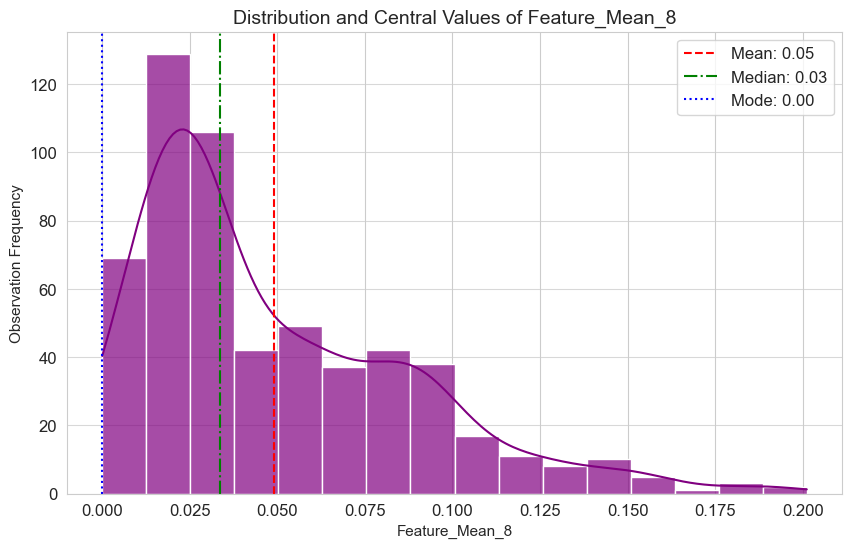


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_9:
  Mean (Average): 0.1812
  Median (Middle Value): 0.1792
  Mode (Most Frequent): 0.1601
  Weighted Mean: 0.1822


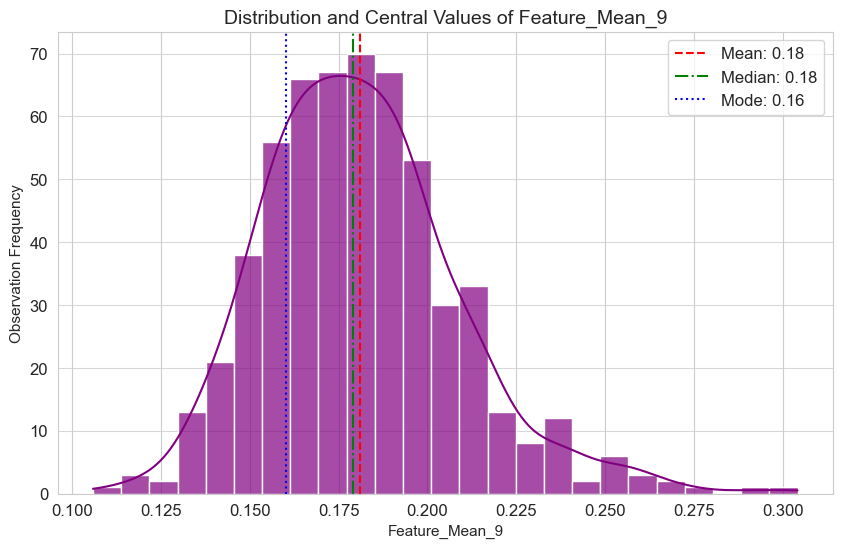


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.



Key Central Tendency Statistics for Feature_Mean_10:
  Mean (Average): 0.0628
  Median (Middle Value): 0.0615
  Mode (Most Frequent): 0.0567
  Weighted Mean: 0.0622


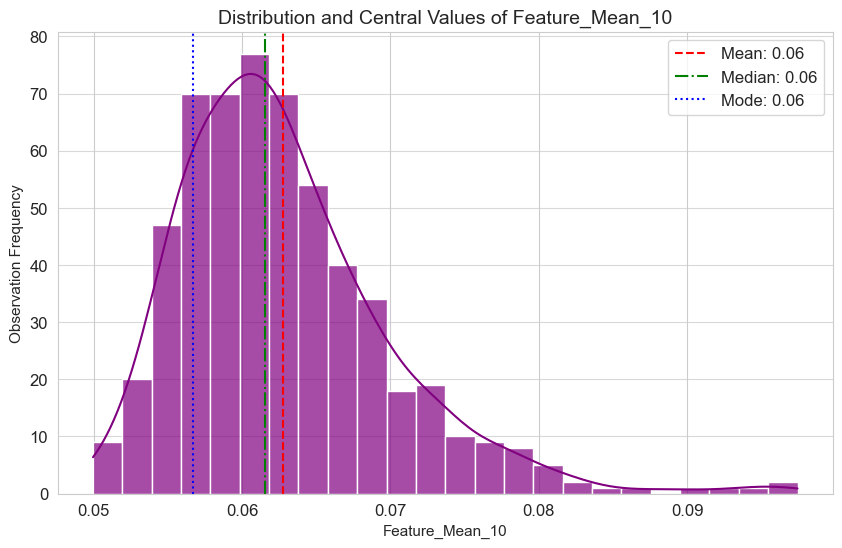


Interpretation of Central Tendency:
  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.




In [4]:
# Dynamically identifying key numerical attributes based on 'Mean_' prefix
primary_numeric_features = [col for col in health_data_df.columns if 'Feature_Mean_' in col]

# Custom function to assess and visualize central location statistics
def examine_central_location(data_source, feature_label):
    """Computes and displays central tendency metrics for a specified feature."""
    feature_data = data_source[feature_label].dropna() # Exclude missing entries

    if feature_data.empty:
        print(f"Alert: No valid entries for {feature_label} after cleansing. Analysis skipped.")
        return

    # Core statistical calculations
    arithmetic_avg = feature_data.mean()
    midpoint_val = feature_data.median()
    common_occurrence = feature_data.mode()[0] if not feature_data.mode().empty else numerical_ops.nan

    # Illustrative weighted average calculation: using a different feature as weights
    # For 'Feature_Mean_1' (Radius), we use 'Feature_Mean_3' (Area) as weights.
    # For other features, 'Feature_Mean_1' (Radius) serves as weights.
    weighted_avg = numerical_ops.nan
    if feature_label == 'Feature_Mean_1':
        weight_feature = 'Feature_Mean_3' # Using Mean_Area as weight for Mean_Radius
    else:
        weight_feature = 'Feature_Mean_1' # Using Mean_Radius as weight for others

    if weight_feature in data_source.columns:
        temp_aligned_data = data_source[[feature_label, weight_feature]].dropna()
        if not temp_aligned_data.empty:
            weighted_avg = numerical_ops.average(temp_aligned_data[feature_label], weights=temp_aligned_data[weight_feature])

    # Outputting the calculated statistics
    print(f"\nKey Central Tendency Statistics for {feature_label}:")
    print(f"  Mean (Average): {arithmetic_avg:.4f}")
    print(f"  Median (Middle Value): {midpoint_val:.4f}")
    print(f"  Mode (Most Frequent): {common_occurrence:.4f}" if not numerical_ops.isnan(common_occurrence) else "  Mode: Not Applicable")
    print(f"  Weighted Mean: {weighted_avg:.4f}" if not numerical_ops.isnan(weighted_avg) else "  Weighted Mean: Not Applicable")

    # Visualizing the distribution with central location markers
    plotting.figure(figsize=(10, 6))
    enhanced_plotting.histplot(feature_data, kde=True, color='purple', alpha=0.7)
    plotting.axvline(arithmetic_avg, color='red', linestyle='--', label=f'Mean: {arithmetic_avg:.2f}')
    plotting.axvline(midpoint_val, color='green', linestyle='-.', label=f'Median: {midpoint_val:.2f}')
    if not numerical_ops.isnan(common_occurrence):
        plotting.axvline(common_occurrence, color='blue', linestyle=':', label=f'Mode: {common_occurrence:.2f}')
    plotting.title(f'Distribution and Central Values of {feature_label}', fontsize=14)
    plotting.xlabel(feature_label, fontsize=11)
    plotting.ylabel('Observation Frequency', fontsize=11)
    plotting.legend()
    plotting.grid(axis='y', alpha=0.75)
    plotting.show()

    # Interpretive insights
    print("\nInterpretation of Central Tendency:")
    if numerical_ops.isclose(arithmetic_avg, midpoint_val, rtol=0.01):
        print("  The mean and median are closely aligned, suggesting a symmetric distribution.")
    elif arithmetic_avg > midpoint_val:
        print("  The mean is greater than the median, indicating a right-skewed distribution. This implies the presence of higher values pulling the mean.")
    else:
        print("  The median exceeds the mean, pointing to a left-skewed distribution. This suggests the presence of lower values influencing the mean.")

    if not numerical_ops.isnan(common_occurrence) and numerical_ops.isclose(common_occurrence, midpoint_val, rtol=0.01):
        print("  The mode is in proximity to the median, a common pattern in many datasets.")
    print("\n" + "="*70 + "\n")

# Execute central tendency analysis for identified primary numerical features
for feat in primary_numeric_features:
    examine_central_location(health_data_df, feat)

## Group-wise Comparison of Feature Averages by Diagnosis

To discern how various biological measurements differ between benign ('B') and malignant ('M') diagnoses, we will perform a comparative analysis of the mean values for selected attributes within each diagnostic group. This comparison is critical for identifying features that exhibit significant discriminatory power, which can be highly informative for classification tasks.

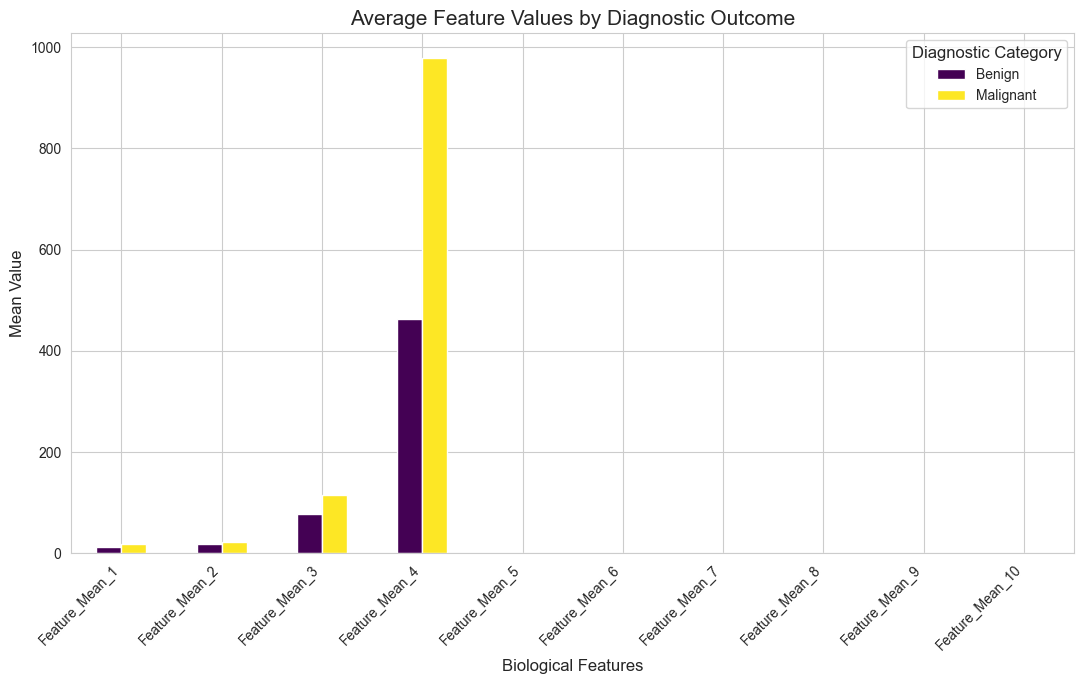


Tabular Mean Values by Diagnosis Category:


Feature_Mean_1  Feature_Mean_2  Feature_Mean_3  \
Diagnosis_Category                                                   
Benign                   12.146524       17.914762       78.075406   
Malignant                17.462830       21.604906      115.365377   

                    Feature_Mean_4  Feature_Mean_5  Feature_Mean_6  \
Diagnosis_Category                                                   
Benign                  462.790196        0.092478        0.080085   
Malignant               978.376415        0.102898        0.145188   

                    Feature_Mean_7  Feature_Mean_8  Feature_Mean_9  \
Diagnosis_Category                                                   
Benign                    0.046058        0.025717        0.174186   
Malignant                 0.160775        0.087990        0.192909   

                    Feature_Mean_10  
Diagnosis_Category                   
Benign                     0.062867  
Malignant                  0.062680


Analytical Insight: The visualization and table clearly demonstrate substantial differences in the average values of several features between benign and malignant cases. These variations are critical for disease differentiation and necessitate deeper statistical scrutiny in predictive modeling.


In [5]:
def compare_feature_means_by_diagnosis(df_input, features_to_analyze):
    """Compares mean values of specified features across different disease diagnosis outcomes."""
    # Map diagnostic codes to human-readable labels for plotting and interpretation
    df_input['Diagnosis_Category'] = df_input['Diagnosis_Result'].map({'M': 'Malignant', 'B': 'Benign'})

    # Calculate mean values for the specified features, grouped by diagnosis category
    mean_values_by_category = df_input.groupby('Diagnosis_Category')[features_to_analyze].mean()

    # Visualize the comparison using a bar plot
    plotting.figure(figsize=(11, 7))
    mean_values_by_category.T.plot(kind='bar', rot=45, ax=plotting.gca(), cmap='viridis')
    plotting.title('Average Feature Values by Diagnostic Outcome', fontsize=15)
    plotting.ylabel('Mean Value', fontsize=12)
    plotting.xlabel('Biological Features', fontsize=12)
    plotting.xticks(rotation=45, ha='right', fontsize=10)
    plotting.yticks(fontsize=10)
    plotting.tight_layout() # Adjust layout to prevent label overlap
    plotting.legend(title='Diagnostic Category', title_fontsize='12', fontsize='10')
    plotting.show()

    # Display the tabular results of grouped averages
    print("\nTabular Mean Values by Diagnosis Category:")
    display(mean_values_by_category)

    print("\nAnalytical Insight: The visualization and table clearly demonstrate substantial differences in the average values of several features between benign and malignant cases. These variations are critical for disease differentiation and necessitate deeper statistical scrutiny in predictive modeling.")
    return mean_values_by_category

# Execute the comparative analysis for the identified primary numerical features
comparison_results = compare_feature_means_by_diagnosis(health_data_df, primary_numeric_features)

## Quantifying Variability: Measures of Dispersion

Beyond central tendency, understanding the spread or variability of data is equally crucial. Dispersion metrics reveal how individual data points deviate from the average, providing insights into data consistency and distribution width. We will compute key measures such as data range, variance, standard deviation, interquartile range (IQR), and the coefficient of variation, illustrating these with informative visualizations.


Variability Statistics for Feature_Mean_1:
  Data Range (Max - Min): 21.1290
  Variance: 12.4189
  Standard Deviation: 3.5240
  Interquartile Range (IQR): 4.0800
  Coefficient of Variation (CV): 24.94%


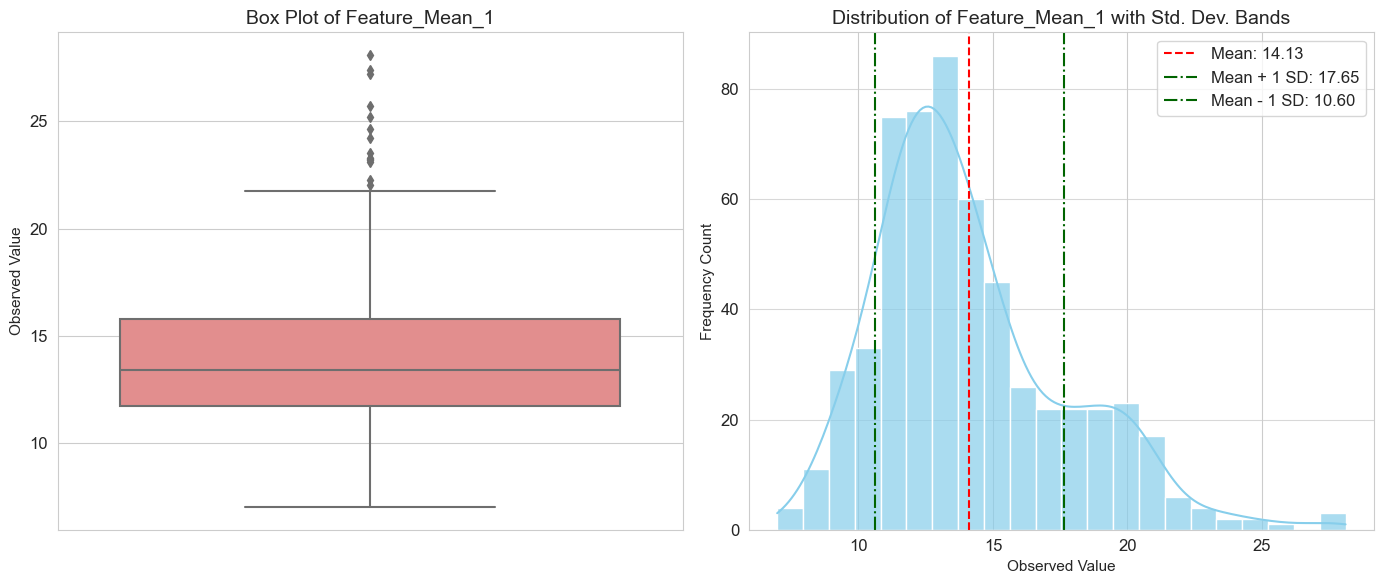


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_1 is 21.1290.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 3.5240.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 4.0800.
  Coefficient of Variation: Moderate variability is observed relative to the mean, indicating a reasonable spread.



Variability Statistics for Feature_Mean_2:
  Data Range (Max - Min): 29.5700
  Variance: 18.4989
  Standard Deviation: 4.3010
  Interquartile Range (IQR): 5.6300
  Coefficient of Variation (CV): 22.30%


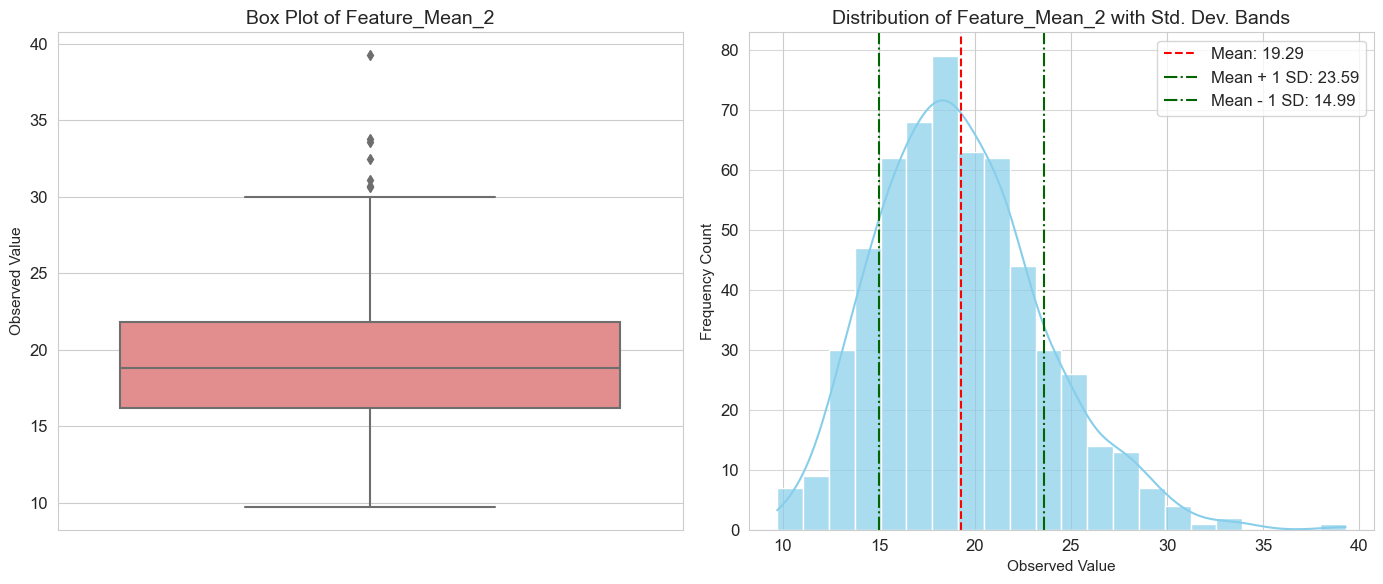


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_2 is 29.5700.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 4.3010.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 5.6300.
  Coefficient of Variation: Moderate variability is observed relative to the mean, indicating a reasonable spread.



Variability Statistics for Feature_Mean_3:
  Data Range (Max - Min): 144.7100
  Variance: 590.4405
  Standard Deviation: 24.2990
  Interquartile Range (IQR): 28.9300
  Coefficient of Variation (CV): 26.42%


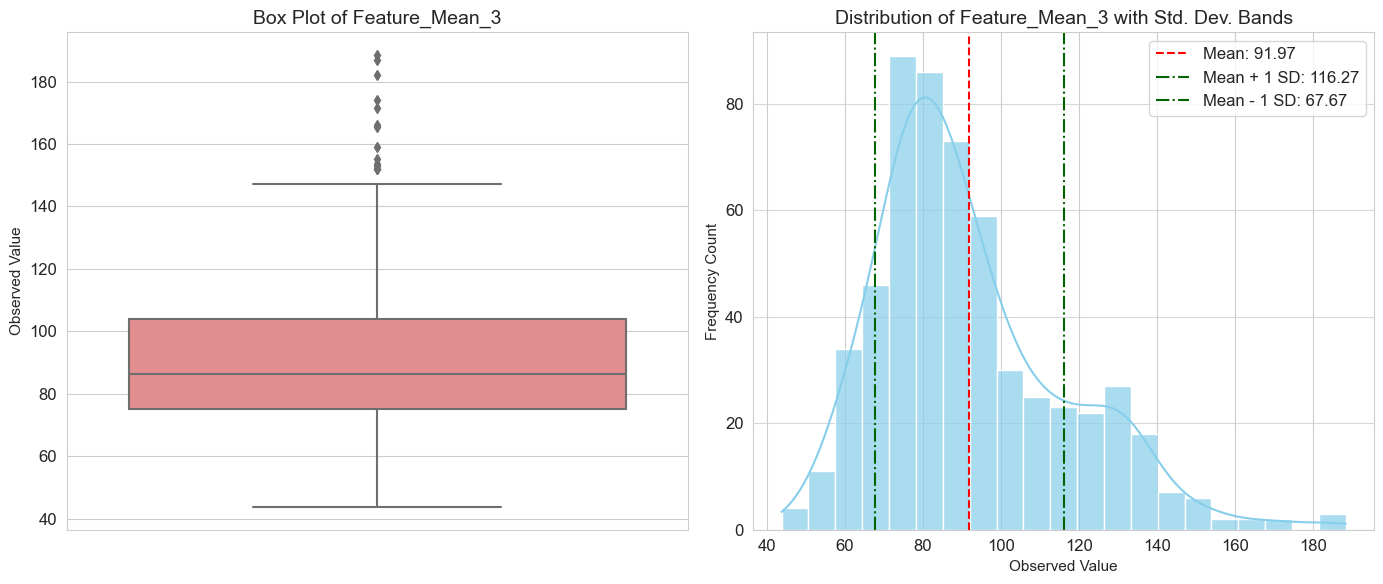


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_3 is 144.7100.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 24.2990.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 28.9300.
  Coefficient of Variation: Moderate variability is observed relative to the mean, indicating a reasonable spread.



Variability Statistics for Feature_Mean_4:
  Data Range (Max - Min): 2357.5000
  Variance: 123843.5543
  Standard Deviation: 351.9141
  Interquartile Range (IQR): 362.4000
  Coefficient of Variation (CV): 53.74%


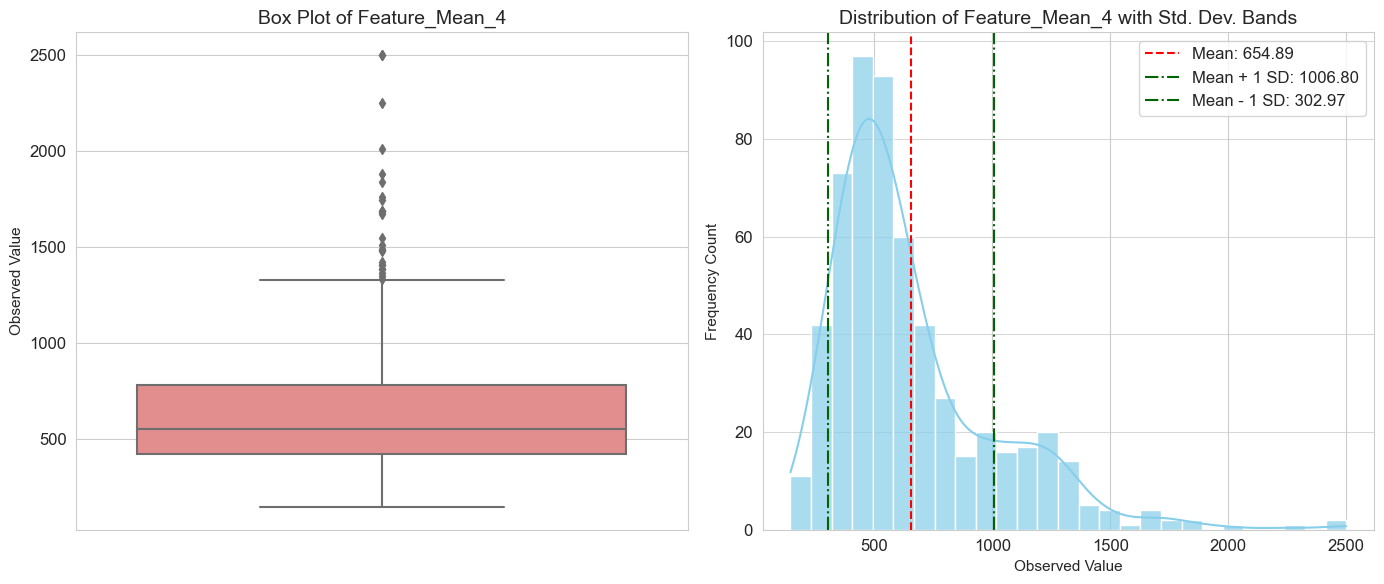


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_4 is 2357.5000.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 351.9141.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 362.4000.
  Coefficient of Variation: High variability is present, implying significant dispersion and less consistency in the data.



Variability Statistics for Feature_Mean_5:
  Data Range (Max - Min): 0.1108
  Variance: 0.0002
  Standard Deviation: 0.0141
  Interquartile Range (IQR): 0.0189
  Coefficient of Variation (CV): 14.60%


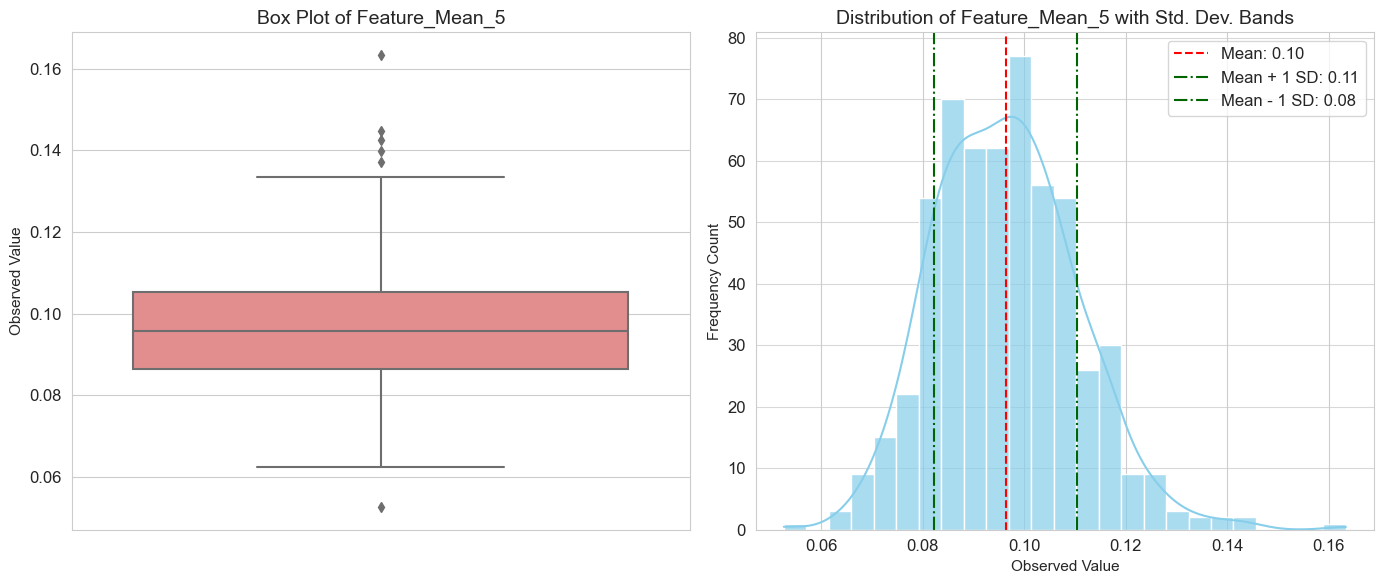


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_5 is 0.1108.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0141.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.0189.
  Coefficient of Variation: The data shows relatively low variability, suggesting high consistency within this feature.



Variability Statistics for Feature_Mean_6:
  Data Range (Max - Min): 0.3260
  Variance: 0.0028
  Standard Deviation: 0.0528
  Interquartile Range (IQR): 0.0655
  Coefficient of Variation (CV): 50.62%


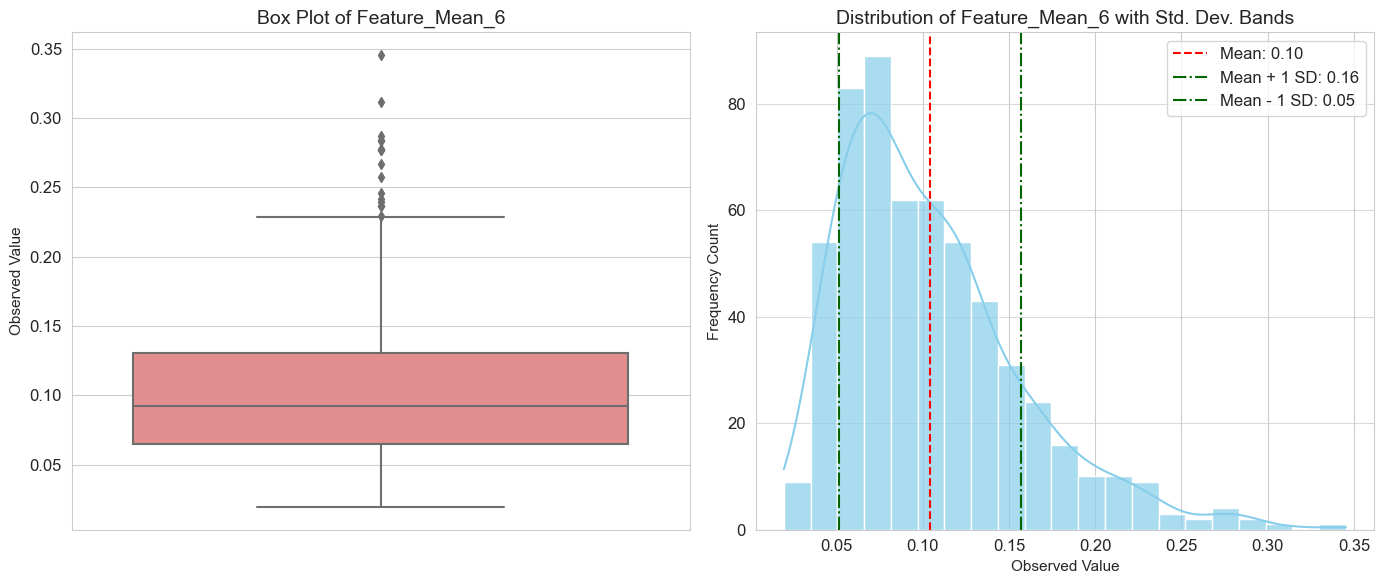


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_6 is 0.3260.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0528.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.0655.
  Coefficient of Variation: High variability is present, implying significant dispersion and less consistency in the data.



Variability Statistics for Feature_Mean_7:
  Data Range (Max - Min): 0.4268
  Variance: 0.0064
  Standard Deviation: 0.0797
  Interquartile Range (IQR): 0.1011
  Coefficient of Variation (CV): 89.78%


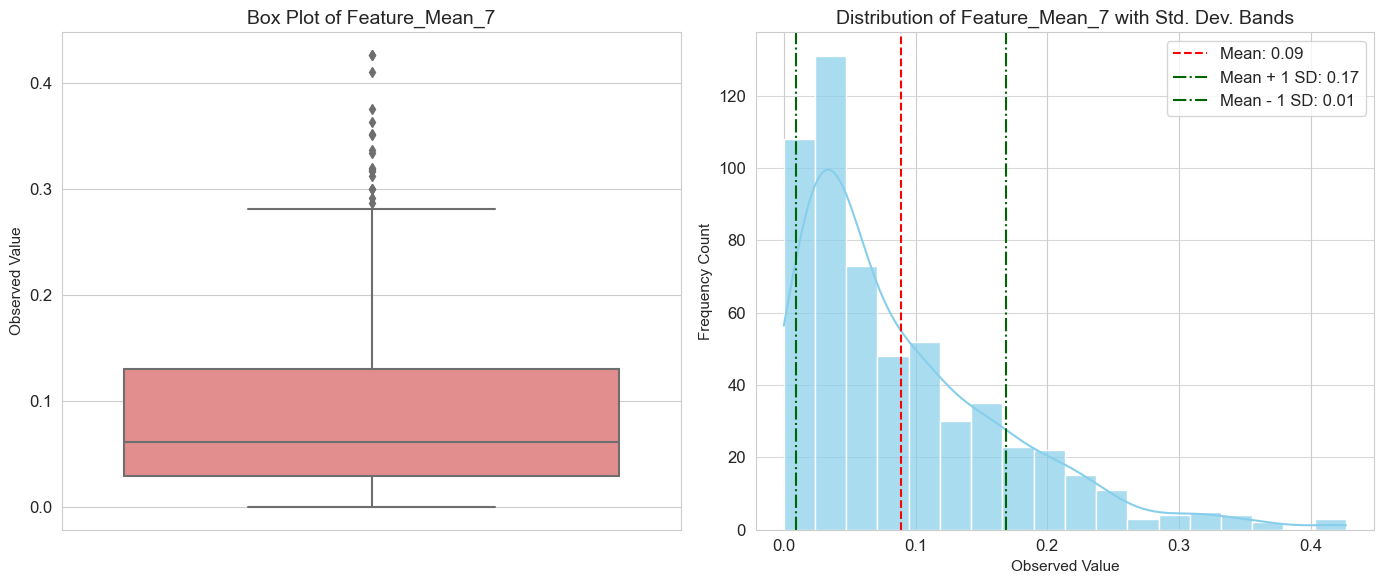


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_7 is 0.4268.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0797.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.1011.
  Coefficient of Variation: High variability is present, implying significant dispersion and less consistency in the data.



Variability Statistics for Feature_Mean_8:
  Data Range (Max - Min): 0.2012
  Variance: 0.0015
  Standard Deviation: 0.0388
  Interquartile Range (IQR): 0.0537
  Coefficient of Variation (CV): 79.32%


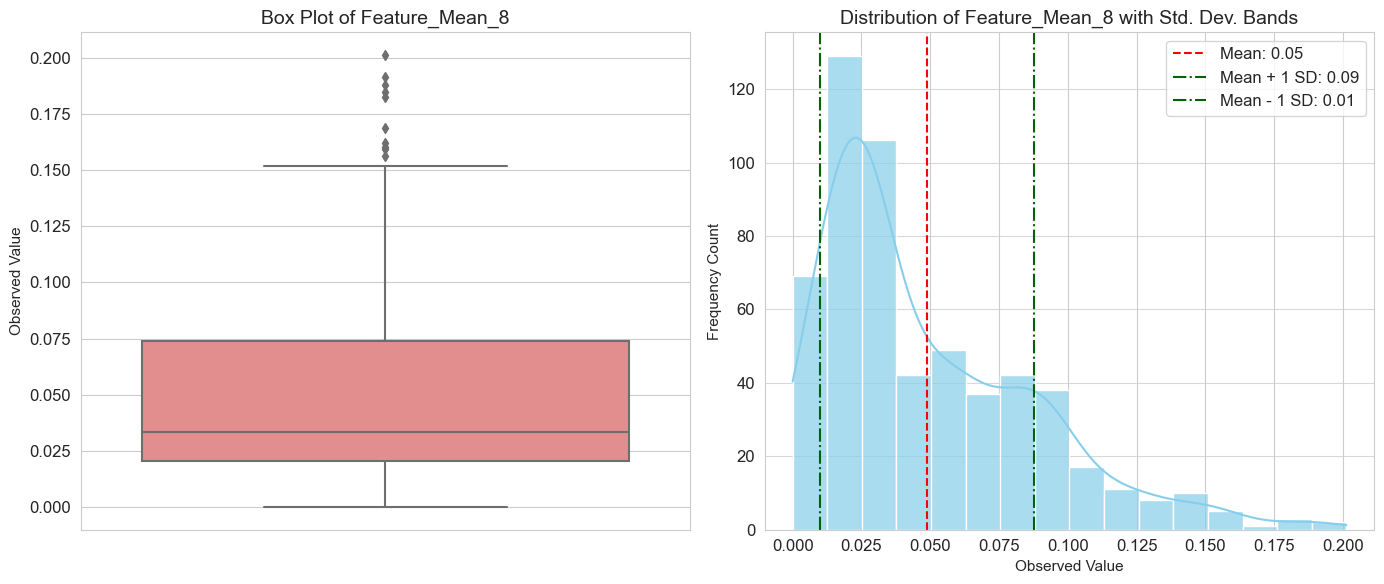


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_8 is 0.2012.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0388.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.0537.
  Coefficient of Variation: High variability is present, implying significant dispersion and less consistency in the data.



Variability Statistics for Feature_Mean_9:
  Data Range (Max - Min): 0.1980
  Variance: 0.0008
  Standard Deviation: 0.0274
  Interquartile Range (IQR): 0.0338
  Coefficient of Variation (CV): 15.13%


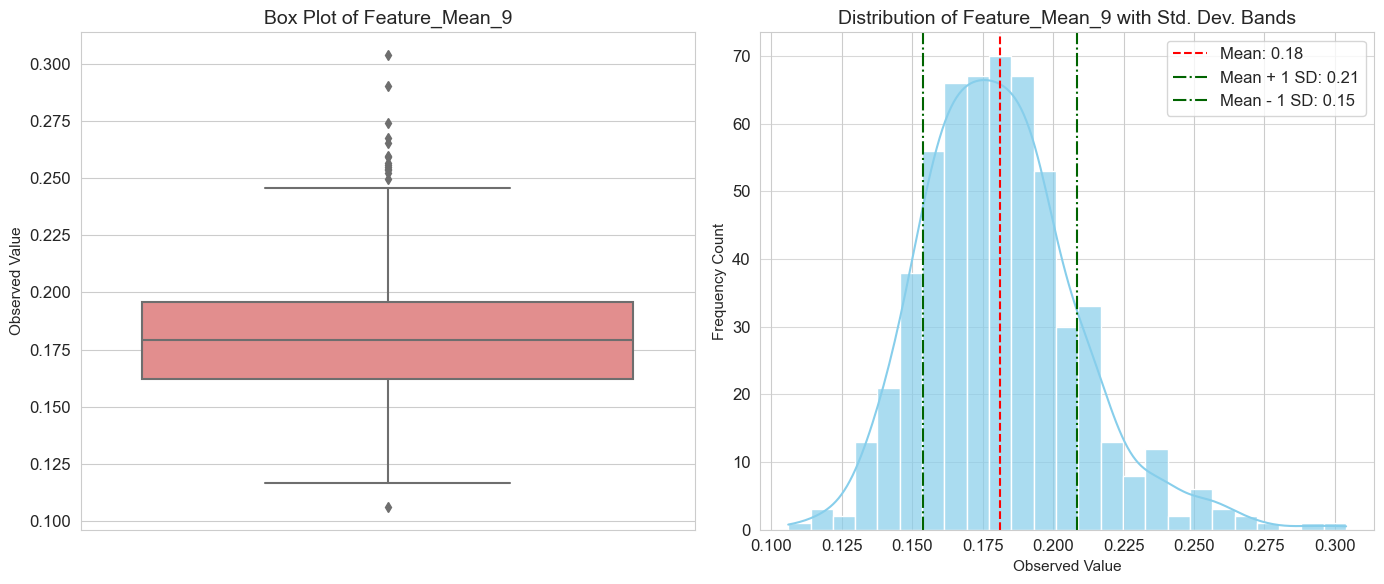


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_9 is 0.1980.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0274.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.0338.
  Coefficient of Variation: Moderate variability is observed relative to the mean, indicating a reasonable spread.



Variability Statistics for Feature_Mean_10:
  Data Range (Max - Min): 0.0475
  Variance: 0.0000
  Standard Deviation: 0.0071
  Interquartile Range (IQR): 0.0084
  Coefficient of Variation (CV): 11.24%


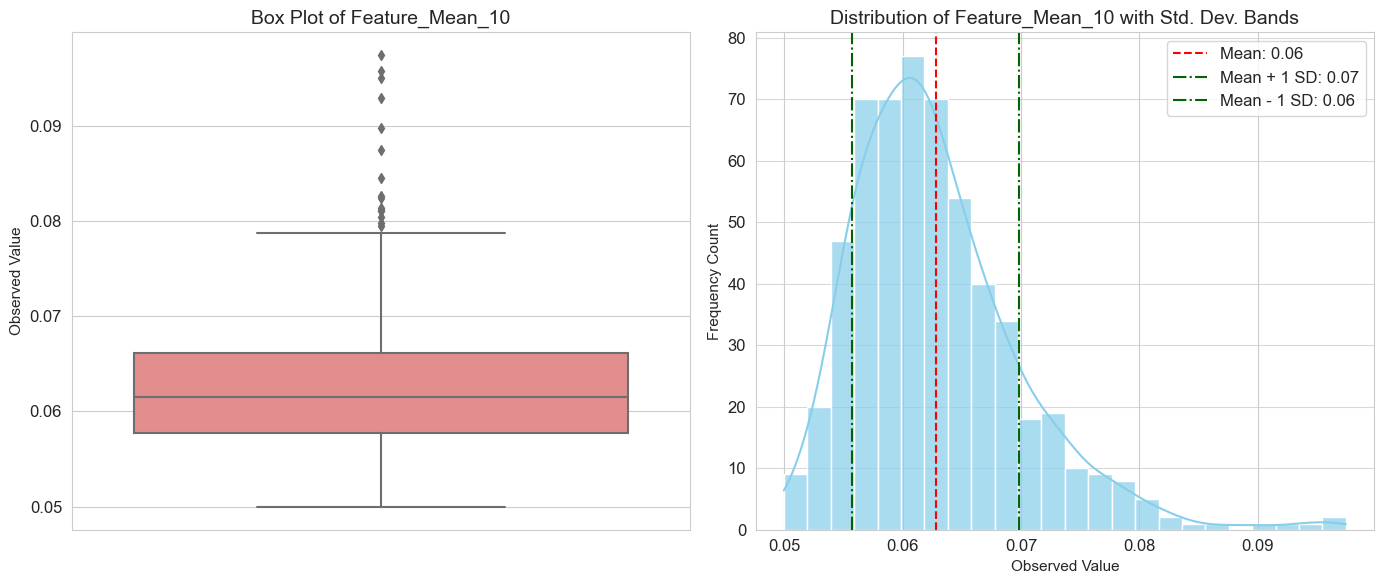


Interpretation of Data Spread:
  Range: The total span of values observed for Feature_Mean_10 is 0.0475.
  Standard Deviation: On average, individual observations in this feature deviate from the mean by 0.0071.
  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of 0.0084.
  Coefficient of Variation: The data shows relatively low variability, suggesting high consistency within this feature.




In [6]:
# Function to calculate and visually represent data dispersion metrics
def assess_data_variability(df_data, feature_col_name):
    """Calculates and visualizes dispersion measures for a given dataset column."""
    clean_data_series = df_data[feature_col_name].dropna() # Remove any NaN values

    if clean_data_series.empty:
        print(f"Warning: No valid data for {feature_col_name} after dropping nulls. Skipping variability analysis.")
        return

    # Calculate core dispersion statistics
    data_ptp_range = numerical_ops.ptp(clean_data_series) # Peak-to-peak range (max - min)
    data_variance_val = clean_data_series.var()
    data_std_dev_val = clean_data_series.std()

    # Calculate quartiles and Interquartile Range (IQR)
    q1_val = clean_data_series.quantile(0.25)
    q3_val = clean_data_series.quantile(0.75)
    iq_range = q3_val - q1_val

    # Calculate Coefficient of Variation (CV) - relative variability
    cv_value = (data_std_dev_val / clean_data_series.mean()) * 100 if clean_data_series.mean() != 0 else numerical_ops.nan

    # Display computed dispersion statistics
    print(f"\nVariability Statistics for {feature_col_name}:")
    print(f"  Data Range (Max - Min): {data_ptp_range:.4f}")
    print(f"  Variance: {data_variance_val:.4f}")
    print(f"  Standard Deviation: {data_std_dev_val:.4f}")
    print(f"  Interquartile Range (IQR): {iq_range:.4f}")
    print(f"  Coefficient of Variation (CV): {cv_value:.2f}%" if not numerical_ops.isnan(cv_value) else "  Coefficient of Variation (CV): N/A")

    # Visualize data spread using a dual-panel plot (boxplot and histogram)
    plotting.figure(figsize=(14, 6))

    plotting.subplot(1, 2, 1) # Box plot for summary and outliers
    enhanced_plotting.boxplot(y=clean_data_series, color='lightcoral')
    plotting.title(f'Box Plot of {feature_col_name}', fontsize=14)
    plotting.ylabel('Observed Value', fontsize=11)

    plotting.subplot(1, 2, 2) # Histogram with mean and standard deviation lines
    enhanced_plotting.histplot(clean_data_series, kde=True, color='skyblue', alpha=0.7)
    plotting.axvline(clean_data_series.mean(), color='red', linestyle='--', label=f'Mean: {clean_data_series.mean():.2f}')
    plotting.axvline(clean_data_series.mean() + data_std_dev_val, color='darkgreen', linestyle='-.', label=f'Mean + 1 SD: {clean_data_series.mean() + data_std_dev_val:.2f}')
    plotting.axvline(clean_data_series.mean() - data_std_dev_val, color='darkgreen', linestyle='-.', label=f'Mean - 1 SD: {clean_data_series.mean() - data_std_dev_val:.2f}')
    plotting.title(f'Distribution of {feature_col_name} with Std. Dev. Bands', fontsize=14)
    plotting.xlabel('Observed Value', fontsize=11)
    plotting.ylabel('Frequency Count', fontsize=11)
    plotting.legend()
    plotting.grid(axis='y', alpha=0.75)

    plotting.tight_layout() # Adjust layout to prevent overlaps
    plotting.show()

    # Interpretation of dispersion results
    print("\nInterpretation of Data Spread:")
    print(f"  Range: The total span of values observed for {feature_col_name} is {data_ptp_range:.4f}.")
    print(f"  Standard Deviation: On average, individual observations in this feature deviate from the mean by {data_std_dev_val:.4f}.")
    print(f"  Interquartile Range (IQR): The middle 50% of the data values are contained within an interval of {iq_range:.4f}.")

    if not numerical_ops.isnan(cv_value):
        if cv_value < 15:
            print("  Coefficient of Variation: The data shows relatively low variability, suggesting high consistency within this feature.")
        elif cv_value < 40:
            print("  Coefficient of Variation: Moderate variability is observed relative to the mean, indicating a reasonable spread.")
        else:
            print("  Coefficient of Variation: High variability is present, implying significant dispersion and less consistency in the data.")
    else:
        print("  Coefficient of Variation: Not calculable (mean value is zero).")
    print("\n" + "="*70 + "\n")

# Apply the dispersion analysis to each primary numerical feature
for feature_item in primary_numeric_features:
    assess_data_variability(health_data_df, feature_item)

## Comparative Analysis of Variability by Diagnosis Group

To complement our analysis of central tendencies, it is equally important to examine how the dispersion of features differs between benign and malignant tumor classifications. Comparing measures like standard deviation and the coefficient of variation across these groups can reveal insights into the consistency and heterogeneity of cellular characteristics within each diagnostic category. Such differences are invaluable for deeper understanding of disease manifestation.

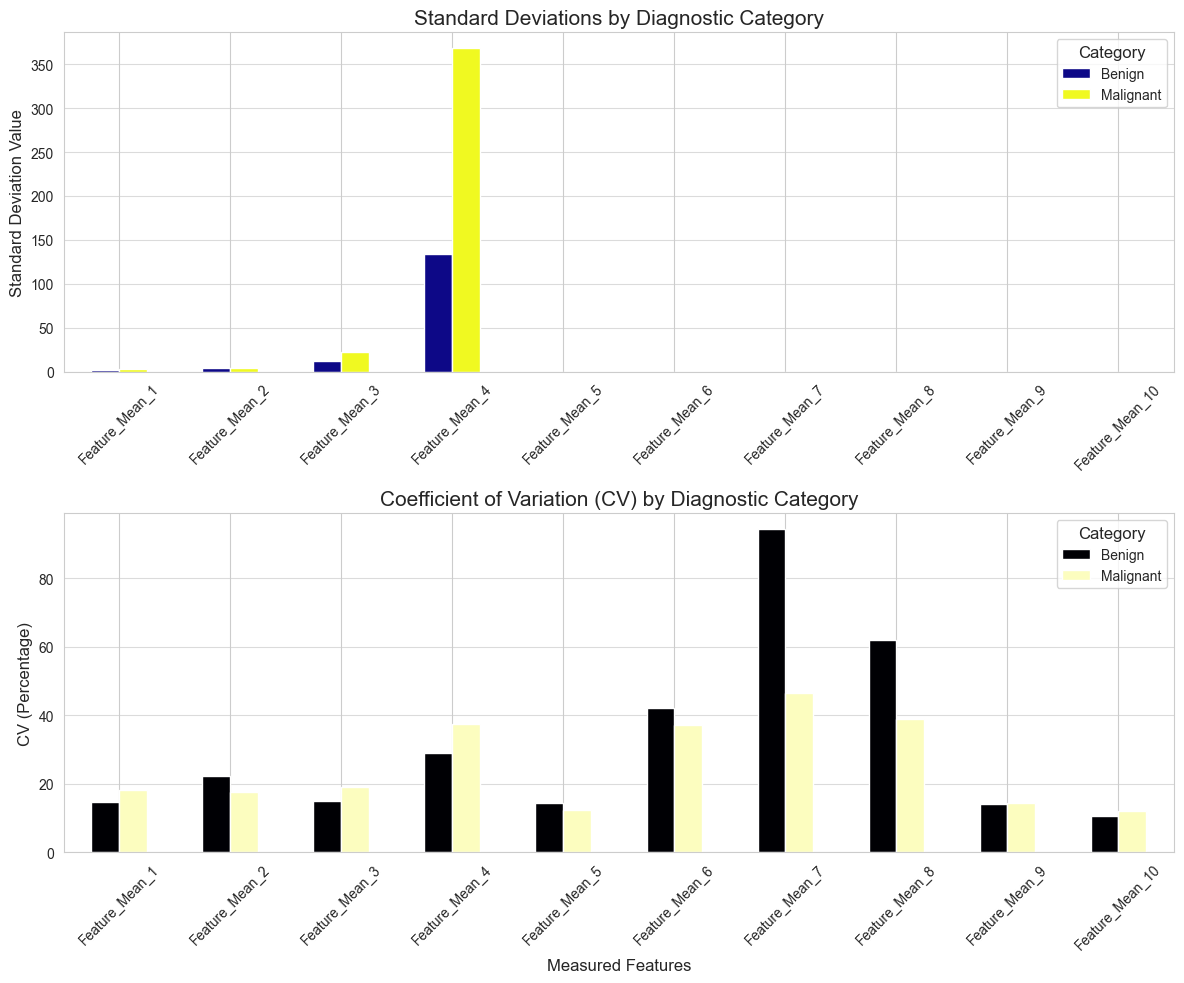


Standard Deviation values per diagnosis group:


Feature_Mean_1  Feature_Mean_2  Feature_Mean_3  \
Diagnosis_Category                                                   
Benign                    1.780512        3.995125       11.807438   
Malignant                 3.203971        3.779470       21.854653   

                    Feature_Mean_4  Feature_Mean_5  Feature_Mean_6  \
Diagnosis_Category                                                   
Benign                  134.287118        0.013446        0.033750   
Malignant               367.937978        0.012608        0.053987   

                    Feature_Mean_7  Feature_Mean_8  Feature_Mean_9  \
Diagnosis_Category                                                   
Benign                    0.043442        0.015909        0.024807   
Malignant                 0.075019        0.034374        0.027638   

                    Feature_Mean_10  
Diagnosis_Category                   
Benign                     0.006747  
Malignant                  0.007573


Coefficient of Variation values per diagnosis group:


Feature_Mean_1  Feature_Mean_2  Feature_Mean_3  \
Diagnosis_Category                                                   
Benign                   14.658611       22.300741       15.123120   
Malignant                18.347376       17.493573       18.943858   

                    Feature_Mean_4  Feature_Mean_5  Feature_Mean_6  \
Diagnosis_Category                                                   
Benign                   29.016846       14.539813       42.142866   
Malignant                37.606996       12.253081       37.184599   

                    Feature_Mean_7  Feature_Mean_8  Feature_Mean_9  \
Diagnosis_Category                                                   
Benign                   94.321309       61.859965       14.241534   
Malignant                46.661148       39.065699       14.327013   

                    Feature_Mean_10  
Diagnosis_Category                   
Benign                    10.732659  
Malignant                 12.082488


Key Observation: An analysis of variability metrics (Standard Deviation and Coefficient of Variation) across benign and malignant tumors offers deeper insight into the consistency and range of cellular characteristics within each group. Divergences in these measures can suggest varying degrees of heterogeneity, which may be crucial for detailed pathological understanding.


In [7]:
def analyze_diagnostic_variability(dataframe_input, features_for_dispersion):
    """Compares data variability (Standard Deviation and Coefficient of Variation) across diagnostic outcomes."""
    # Ensure the diagnosis category labels are present
    if 'Diagnosis_Category' not in dataframe_input.columns:
        dataframe_input['Diagnosis_Category'] = dataframe_input['Diagnosis_Result'].map({'M': 'Malignant', 'B': 'Benign'})

    # Compute standard deviations, grouped by diagnostic category
    std_devs_by_cat = dataframe_input.groupby('Diagnosis_Category')[features_for_dispersion].std()

    # Compute mean values, grouped by diagnostic category (required for CV calculation)
    means_by_cat = dataframe_input.groupby('Diagnosis_Category')[features_for_dispersion].mean()

    # Calculate Coefficient of Variation (CV) and manage potential division by zero
    cvs_by_cat = (std_devs_by_cat / means_by_cat) * 100
    cvs_by_cat = cvs_by_cat.replace([numerical_ops.inf, -numerical_ops.inf], numerical_ops.nan) # Replace infinite values with NaN

    # Create a multi-panel plot for visualizing standard deviations and CVs
    fig_multi, axes_multi = plotting.subplots(nrows=2, ncols=1, figsize=(12, 10))

    # Plotting standard deviations
    std_devs_by_cat.T.plot(kind='bar', rot=45, ax=axes_multi[0], cmap='plasma')
    axes_multi[0].set_title('Standard Deviations by Diagnostic Category', fontsize=15)
    axes_multi[0].set_ylabel('Standard Deviation Value', fontsize=12)
    axes_multi[0].tick_params(axis='x', rotation=45, labelsize=10)
    axes_multi[0].tick_params(axis='y', labelsize=10)
    axes_multi[0].legend(title='Category', title_fontsize='12', fontsize='10')
    axes_multi[0].grid(axis='y', alpha=0.7)

    # Plotting coefficients of variation
    cvs_by_cat.T.plot(kind='bar', rot=45, ax=axes_multi[1], cmap='magma')
    axes_multi[1].set_title('Coefficient of Variation (CV) by Diagnostic Category', fontsize=15)
    axes_multi[1].set_ylabel('CV (Percentage)', fontsize=12)
    axes_multi[1].set_xlabel('Measured Features', fontsize=12)
    axes_multi[1].tick_params(axis='x', rotation=45, labelsize=10)
    axes_multi[1].tick_params(axis='y', labelsize=10)
    axes_multi[1].legend(title='Category', title_fontsize='12', fontsize='10')
    axes_multi[1].grid(axis='y', alpha=0.7)

    plotting.tight_layout() # Optimize plot layout
    plotting.show()

    # Display tabular results for review
    print("\nStandard Deviation values per diagnosis group:")
    display(std_devs_by_cat)

    print("\nCoefficient of Variation values per diagnosis group:")
    display(cvs_by_cat)

    print("\nKey Observation: An analysis of variability metrics (Standard Deviation and Coefficient of Variation) across benign and malignant tumors offers deeper insight into the consistency and range of cellular characteristics within each group. Divergences in these measures can suggest varying degrees of heterogeneity, which may be crucial for detailed pathological understanding.")
    return std_devs_by_cat, cvs_by_cat

# Execute the comparative dispersion analysis
diagnosis_std_devs, diagnosis_cvs = analyze_diagnostic_variability(health_data_df, primary_numeric_features)

## Advanced Visualizations for Feature Relationships and Group Distinctions

Moving beyond fundamental descriptive statistics, sophisticated visualization techniques enable the discovery of more intricate relationships and patterns within the dataset. We will employ a series of advanced plots, including correlation matrices, pair plots, and integrated box-and-point plots (swarm/violin plots), to meticulously explore the inter-feature relationships and delineate disparities between the diagnostic groups.

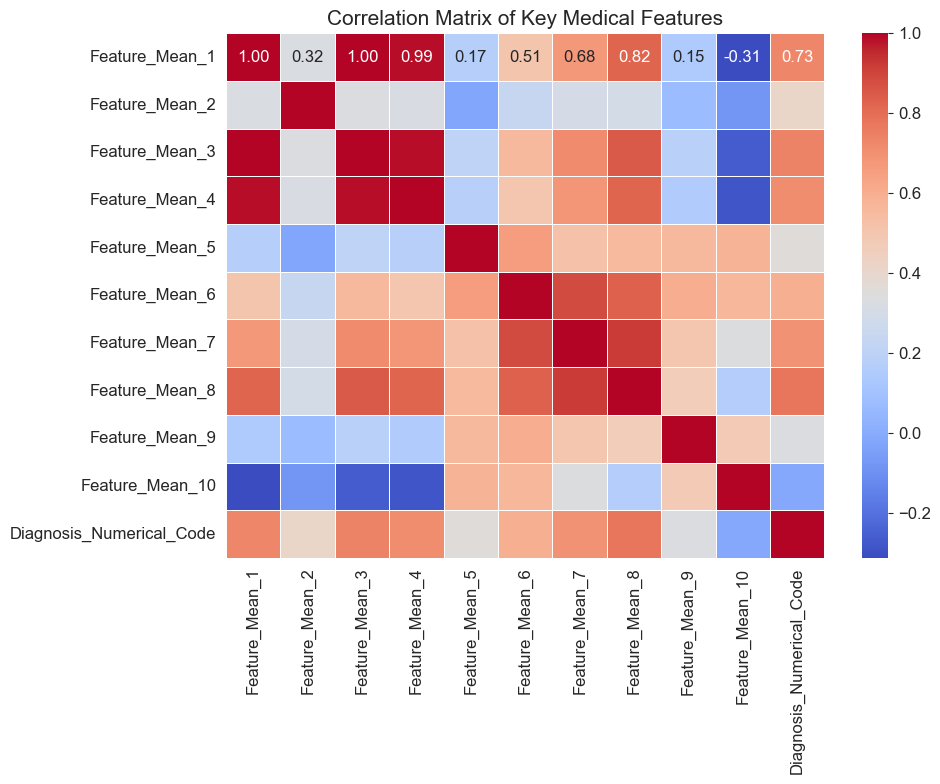


Elucidation of the Correlation Matrix:
  This matrix visually represents the strength and direction of linear relationships between each pair of variables. Correlation coefficients range from -1 to +1:
    +1: Signifies a perfect positive linear correlation (an increase in one variable is directly proportional to an increase in the other).
    0: Denotes an absence of a linear relationship.
    -1: Indicates a perfect negative linear correlation (an increase in one variable is directly proportional to a decrease in the other).

  Primary Insight: Pay close attention to features exhibiting strong correlations with the 'Diagnosis_Numerical_Code', as these features are likely powerful predictors of the disease outcome.


In [8]:
# Convert the categorical diagnosis result to a numerical representation (0 for Benign, 1 for Malignant) for correlation computations
health_data_df['Diagnosis_Numerical_Code'] = health_data_df['Diagnosis_Result'].map({'M': 1, 'B': 0})

# Select a subset of features for in-depth visualization and correlation analysis
relevant_visualization_features = primary_numeric_features + ['Diagnosis_Numerical_Code']

# Construct a correlation matrix to quantify linear associations between the selected attributes
correlation_matrix_subset = health_data_df[relevant_visualization_features].corr()

# Visualize the correlation matrix as a heatmap for intuitive understanding
plotting.figure(figsize=(10, 8))
enhanced_plotting.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f",
                          xticklabels=relevant_visualization_features,
                          yticklabels=relevant_visualization_features,
                          linewidths=.5)
plotting.title('Correlation Matrix of Key Medical Features', fontsize=15)
plotting.tight_layout()
plotting.show()

print("\nElucidation of the Correlation Matrix:")
print("  This matrix visually represents the strength and direction of linear relationships between each pair of variables. Correlation coefficients range from -1 to +1:")
print("    +1: Signifies a perfect positive linear correlation (an increase in one variable is directly proportional to an increase in the other).")
print("    0: Denotes an absence of a linear relationship.")
print("    -1: Indicates a perfect negative linear correlation (an increase in one variable is directly proportional to a decrease in the other).")
print("\n  Primary Insight: Pay close attention to features exhibiting strong correlations with the 'Diagnosis_Numerical_Code', as these features are likely powerful predictors of the disease outcome.")

### Pair Plot: Visualizing Inter-Feature Relationships and Distributions

A pair plot, or scatter plot matrix, is an excellent tool for simultaneously visualizing bivariate relationships between all pairs of features and the univariate distribution of each individual feature. This provides a holistic view of the data's structure and helps in identifying potential correlations, patterns, and distinctions between different diagnostic groups.

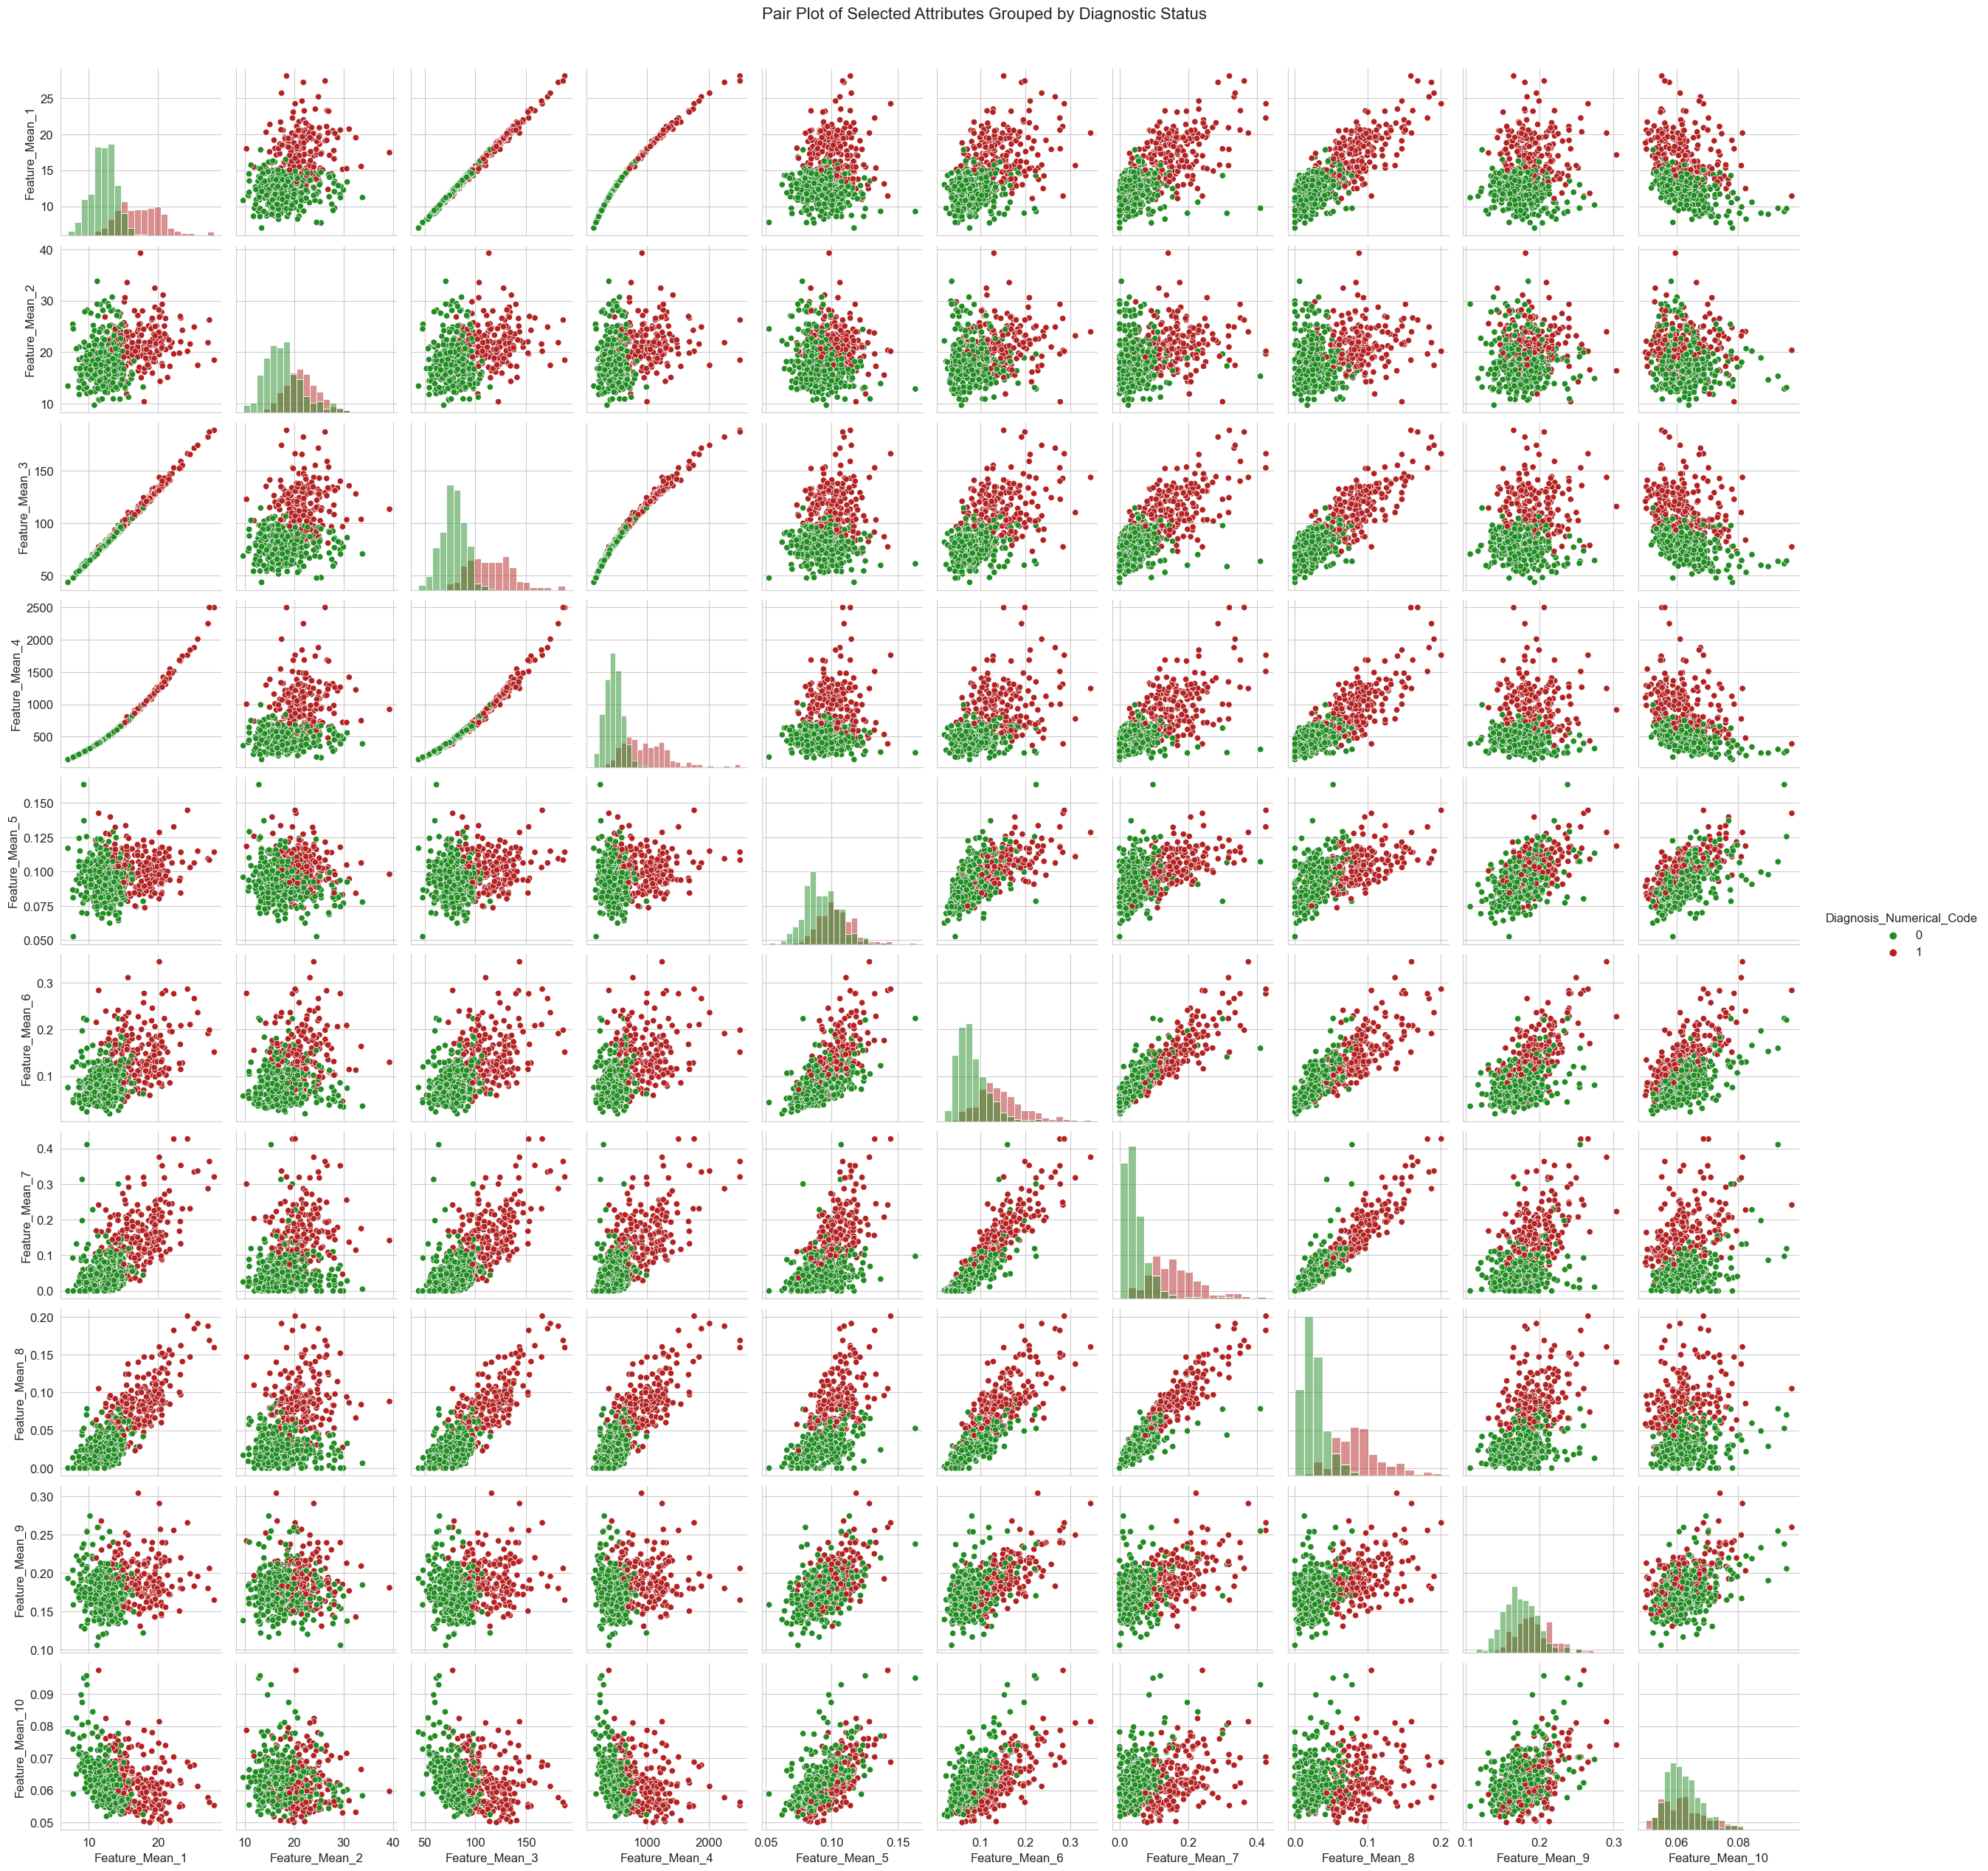


Insights from Pair Plot:
  The pair plot displays a grid of scatter plots for every feature pair and a histogram for each individual feature. This arrangement is highly effective for discerning both pairwise relationships and individual variable distributions.
  Histograms along the diagonal illustrate the distributional shape of single variables.
  Off-diagonal scatter plots depict the nature of the relationship between two variables, making it easy to spot linear or non-linear trends.
  Color-coding by diagnosis (green for benign, red for malignant) aids in identifying how diagnostic groups cluster or separate across different feature combinations, indicating features with strong predictive potential.


In [9]:
# Generate a pair plot for selected features, colored by the numerical diagnosis code
pair_grid_visualization = enhanced_plotting.pairplot(health_data_df[relevant_visualization_features],
                                                     hue='Diagnosis_Numerical_Code',
                                                     palette={0: 'forestgreen', 1: 'firebrick'}, # Assign distinct colors for benign and malignant
                                                     hue_order=[0, 1],
                                                     diag_kind='hist') # Use histograms for diagonal plots to show distributions

pair_grid_visualization.fig.suptitle('Pair Plot of Selected Attributes Grouped by Diagnostic Status', y=1.02, fontsize=16)
plotting.show()

print("\nInsights from Pair Plot:")
print("  The pair plot displays a grid of scatter plots for every feature pair and a histogram for each individual feature. This arrangement is highly effective for discerning both pairwise relationships and individual variable distributions.")
print("  Histograms along the diagonal illustrate the distributional shape of single variables.")
print("  Off-diagonal scatter plots depict the nature of the relationship between two variables, making it easy to spot linear or non-linear trends.")
print("  Color-coding by diagnosis (green for benign, red for malignant) aids in identifying how diagnostic groups cluster or separate across different feature combinations, indicating features with strong predictive potential.")

### Combined Box and Swarm Plots: Detailed Group Distribution Comparison

To gain a nuanced understanding of how feature distributions vary across diagnostic groups, we combine box plots with swarm plots. Box plots offer a concise summary of central tendency, spread, and outliers, while swarm plots overlay individual data points, preventing overlap and revealing the actual density and distribution of observations within each category. This dual visualization provides both aggregated statistics and granular data insights.

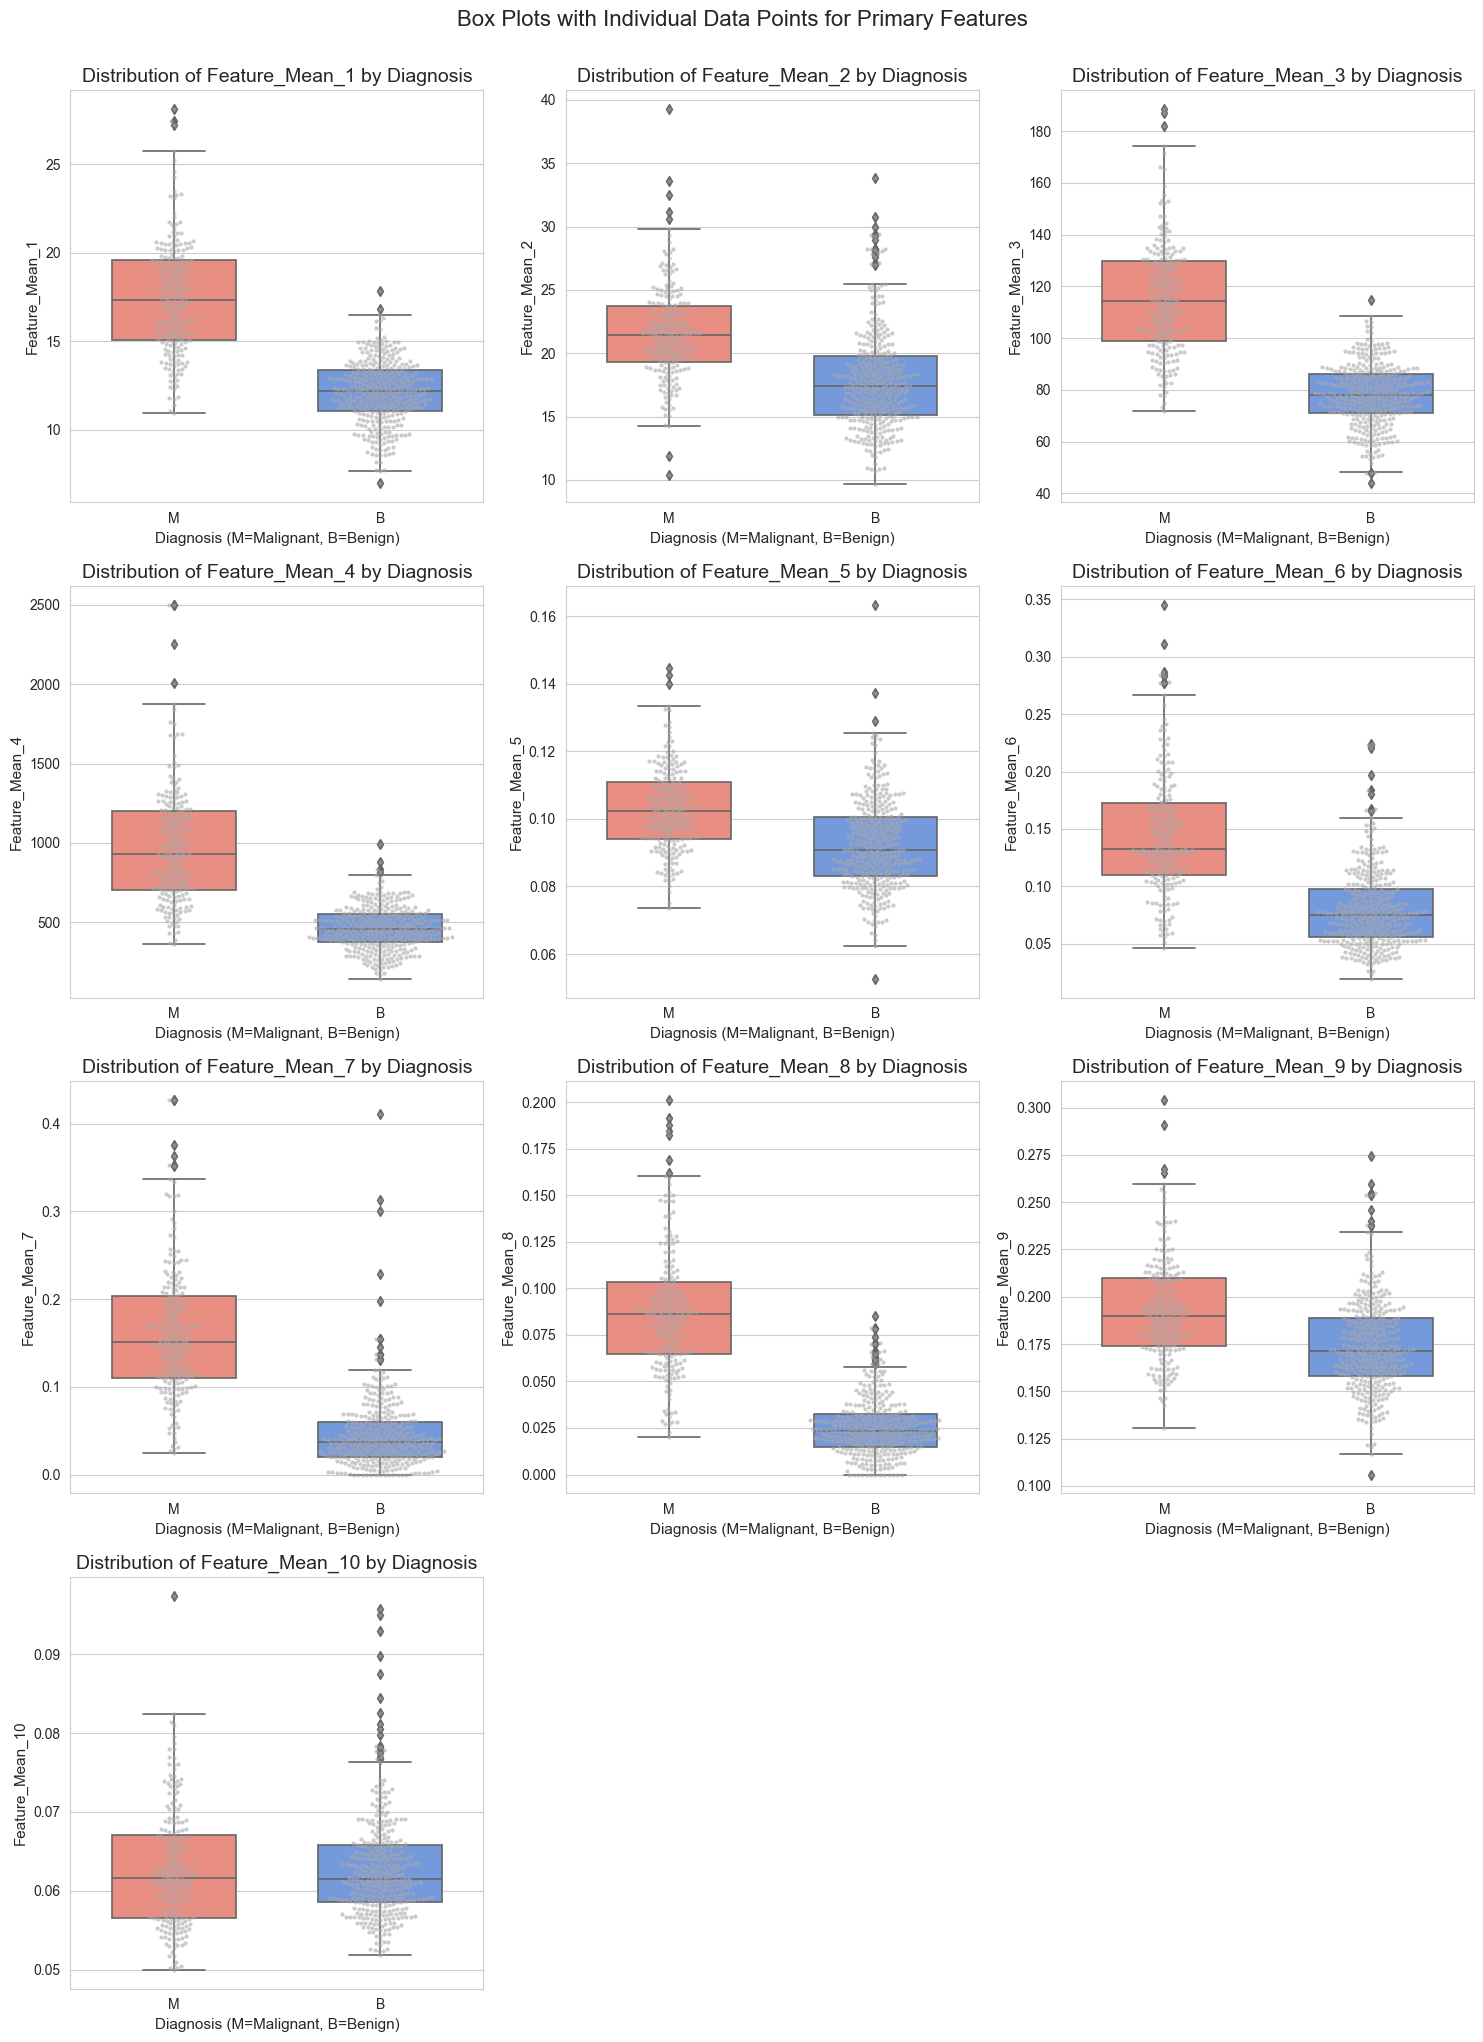


Analytical Review of Combined Plots:
  The integration of box plots and swarm plots offers a comprehensive view of feature distributions across diagnostic categories. Box plots effectively illustrate key summary statistics—median, interquartile range, and potential outliers—providing a macroscopic perspective.
  Simultaneously, swarm plots render each individual data point, artfully offsetting them to prevent overlap. This allows for a clear visualization of data density and the precise location of observations within each group, offering a microscopic view of the data's granular structure.

  Key Takeaway: This combined visualization is exceptionally useful for directly comparing the central tendencies and data spreads between benign and malignant diagnoses, highlighting not only differences in value ranges but also variations in data concentration and the presence of atypical observations.


In [10]:
num_features = len(primary_numeric_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plotting.subplots(rows, cols, figsize=(15, 5 * rows))

# axes can be 2D if rows>1, so flatten for easy indexing
axes = axes.flatten()

for index, attribute_name in enumerate(primary_numeric_features):
    ax = axes[index]

    # Box plot
    enhanced_plotting.boxplot(
        x='Diagnosis_Result',
        y=attribute_name,
        data=health_data_df,
        palette={'M': 'salmon', 'B': 'cornflowerblue'},
        width=0.6,
        linewidth=1.2,
        ax=ax
    )

    # Swarm plot
    enhanced_plotting.swarmplot(
        x='Diagnosis_Result',
        y=attribute_name,
        data=health_data_df,
        color='darkgrey',
        alpha=0.6,
        size=3,
        ax=ax
    )

    ax.set_title(f'Distribution of {attribute_name} by Diagnosis', fontsize=14)
    ax.set_xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=11)
    ax.set_ylabel(attribute_name, fontsize=11)
    ax.tick_params(axis='both', labelsize=10)

# If there are unused subplots (when num_features is not a multiple of 3), hide them
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.suptitle('Box Plots with Individual Data Points for Primary Features',
             y=1.02, fontsize=16)
plotting.show()

print("\nAnalytical Review of Combined Plots:")
print("  The integration of box plots and swarm plots offers a comprehensive view of feature distributions across diagnostic categories. Box plots effectively illustrate key summary statistics—median, interquartile range, and potential outliers—providing a macroscopic perspective.")
print("  Simultaneously, swarm plots render each individual data point, artfully offsetting them to prevent overlap. This allows for a clear visualization of data density and the precise location of observations within each group, offering a microscopic view of the data's granular structure.")
print("\n  Key Takeaway: This combined visualization is exceptionally useful for directly comparing the central tendencies and data spreads between benign and malignant diagnoses, highlighting not only differences in value ranges but also variations in data concentration and the presence of atypical observations.")


### Violin Plots: Richer Comparisons of Distribution Shapes

Violin plots extend the utility of box plots by illustrating the full distribution of data within each group. They combine a box plot's statistical summaries with a kernel density estimation of the data, providing a more comprehensive view of the distribution's shape, density, and potential multimodality across different diagnostic categories. This makes them particularly effective for revealing subtle differences in distributions that might be missed by simpler plots.

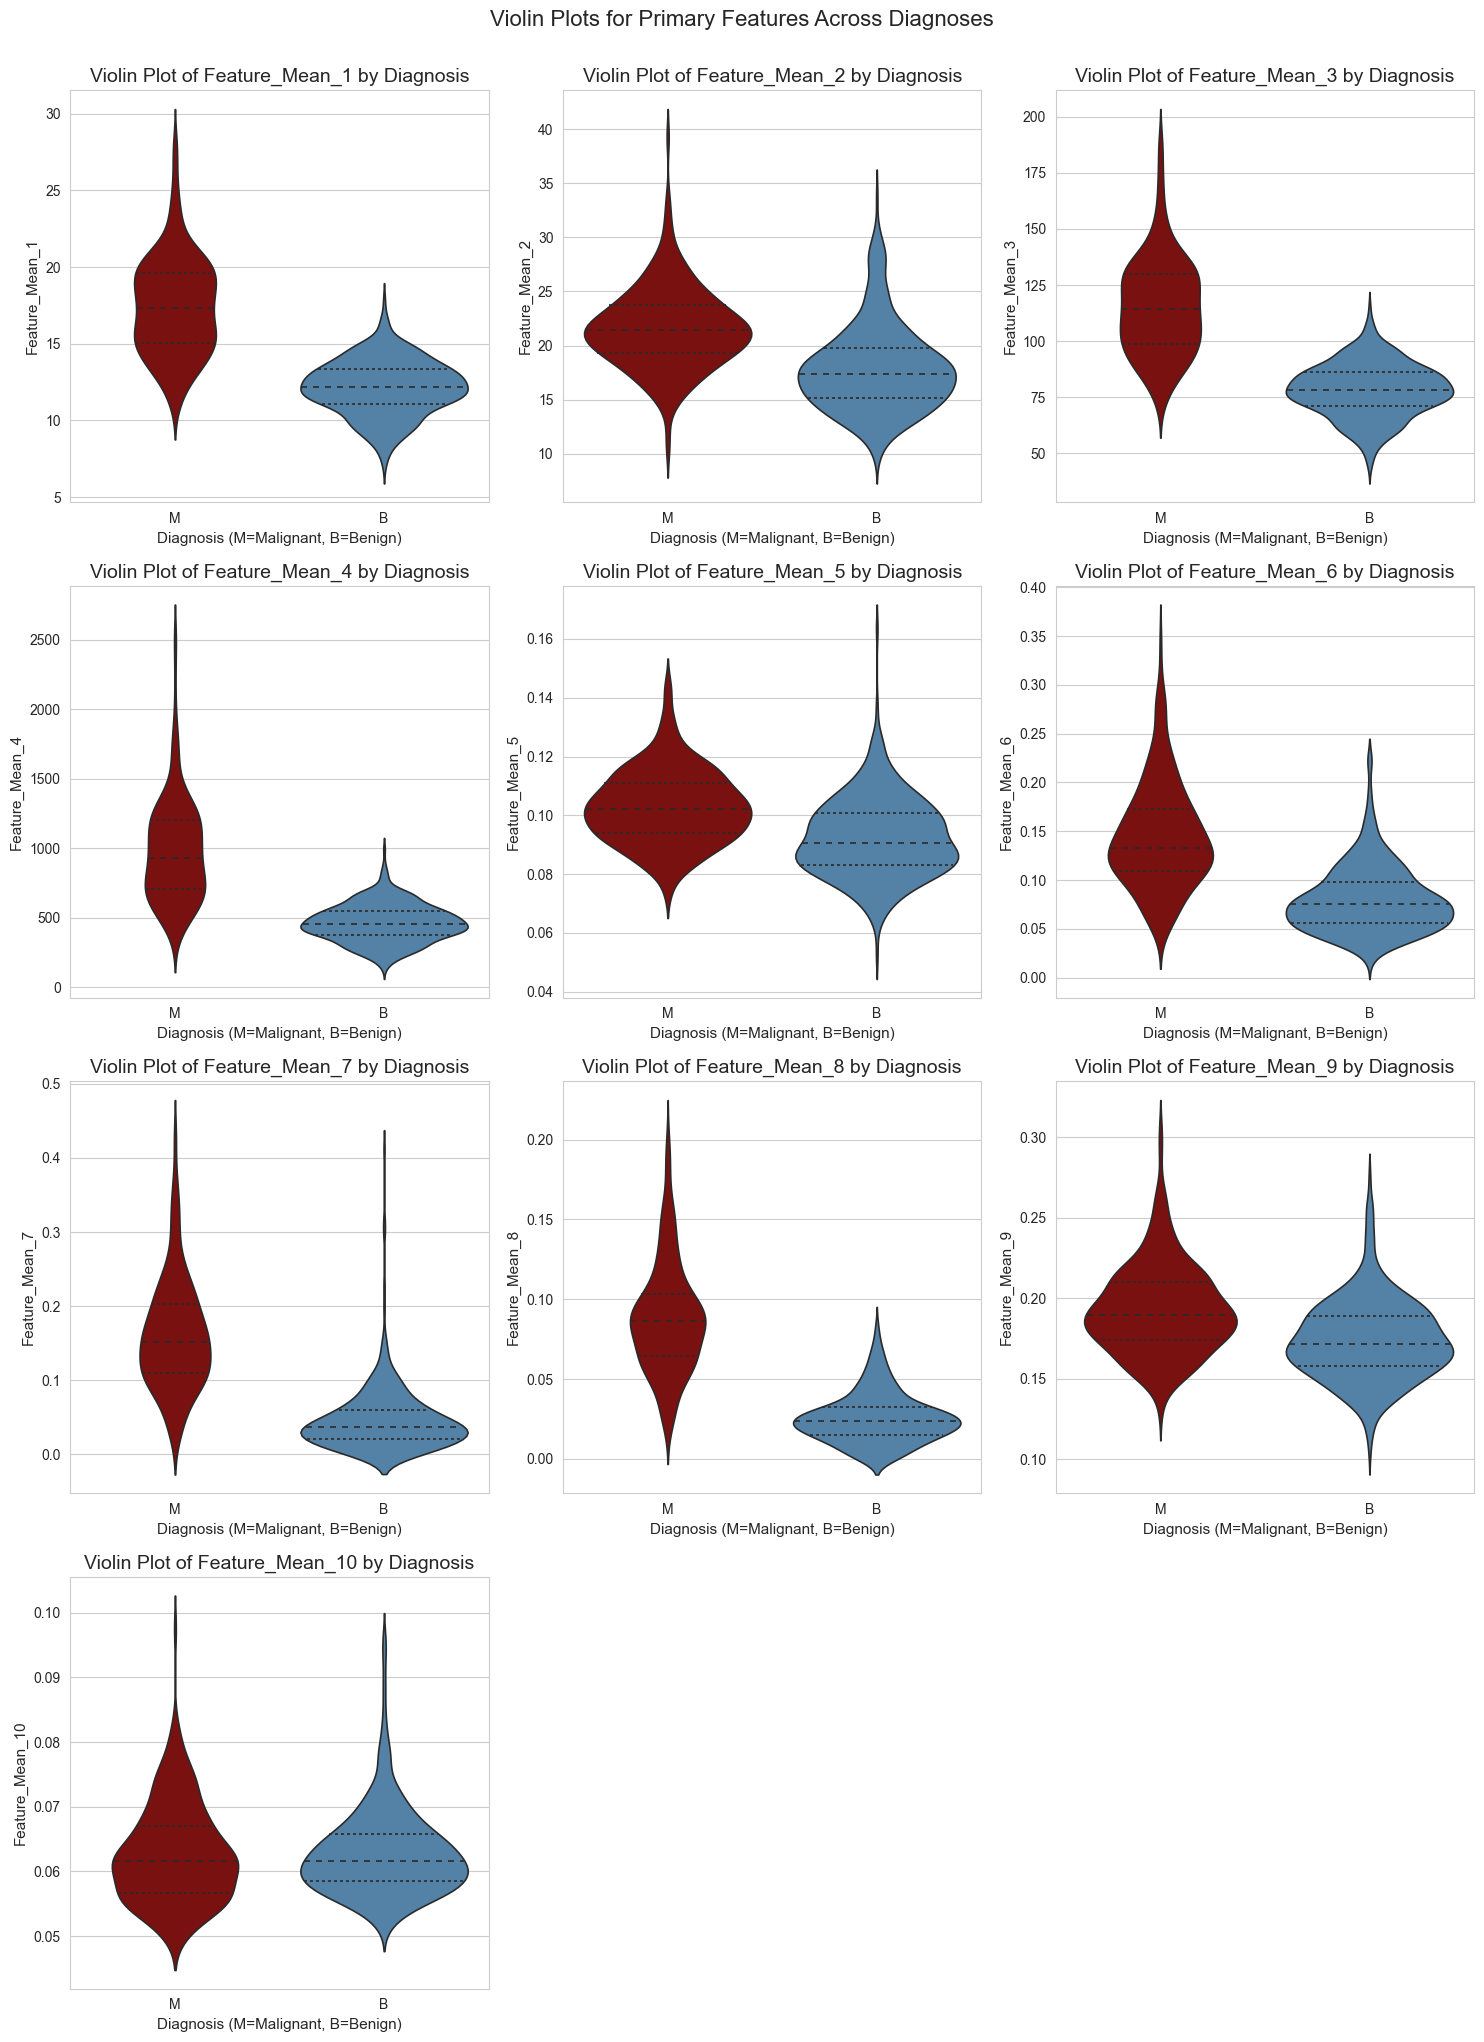


Dissection of Violin Plots:
  Violin plots are sophisticated visualizations that fuse the benefits of box plots with kernel density estimations. They effectively showcase the distribution's contour, density, and key statistical summaries for each group under consideration.
  The wider segments of the 'violin' signify a higher probability density, indicating a greater concentration of data points, while narrower sections imply sparser data. The internal markings typically delineate the median and the interquartile range, similar to a box plot.

  Core Revelation: These plots are exceptionally powerful for conducting detailed comparisons of complex distributions between various groups. They enable us to pinpoint not only differences in central location and spread but also subtle variations in the modality (e.g., presence of multiple peaks) and skewness inherent to each diagnostic category.


In [11]:
num_features = len(primary_numeric_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plotting.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

for index_val, feature_item_name in enumerate(primary_numeric_features):
    ax = axes[index_val]

    # Violinplot
    enhanced_plotting.violinplot(
        x='Diagnosis_Result',
        y=feature_item_name,
        data=health_data_df,
        palette={'M': 'darkred', 'B': 'steelblue'},
        inner='quartile',
        linewidth=1.2,
        ax=ax
    )

    ax.set_title(f'Violin Plot of {feature_item_name} by Diagnosis', fontsize=14)
    ax.set_xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=11)
    ax.set_ylabel(feature_item_name, fontsize=11)
    ax.tick_params(axis='both', labelsize=10)

# Hide any unused axes if features are not a multiple of 3
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.suptitle(
    'Violin Plots for Primary Features Across Diagnoses',
    y=1.02,
    fontsize=16
)

plotting.show()

print("\nDissection of Violin Plots:")
print("  Violin plots are sophisticated visualizations that fuse the benefits of box plots with kernel density estimations. They effectively showcase the distribution's contour, density, and key statistical summaries for each group under consideration.")
print("  The wider segments of the 'violin' signify a higher probability density, indicating a greater concentration of data points, while narrower sections imply sparser data. The internal markings typically delineate the median and the interquartile range, similar to a box plot.")
print("\n  Core Revelation: These plots are exceptionally powerful for conducting detailed comparisons of complex distributions between various groups. They enable us to pinpoint not only differences in central location and spread but also subtle variations in the modality (e.g., presence of multiple peaks) and skewness inherent to each diagnostic category.")

## Detailed Statistical Overview by Diagnostic Groups

To synthesize our findings and provide a ready reference, we will generate a comprehensive table summarizing various descriptive statistics for each feature, segmented by diagnostic outcome (Benign vs. Malignant). This granular summary facilitates a direct comparison of the full spectrum of statistical properties, offering crucial insights into the characteristic distinctions between the two disease states across all measured parameters.

In [12]:
# Group the dataset by 'Diagnosis_Result' and compute descriptive statistics for numerical features
detailed_grouped_stats = health_data_df.groupby('Diagnosis_Result')[primary_numeric_features].describe()

print("Comprehensive Statistical Summary, Grouped by Diagnosis:")
display(detailed_grouped_stats)

print("\nThis expansive table provides a juxtaposed comparison of descriptive statistics (including count, mean, std. deviation, min, 25th percentile, median, 75th percentile, and max) for each primary feature. The data is distinctly categorized by benign (B) and malignant (M) diagnoses. This serves as a rich informational resource for identifying and comprehending the characteristic variances between the two disease conditions across all evaluated parameters.")

Comprehensive Statistical Summary, Grouped by Diagnosis:


Feature_Mean_1                                               \
                          count       mean       std     min     25%     50%   
Diagnosis_Result                                                               
B                         357.0  12.146524  1.780512   6.981  11.080  12.200   
M                         212.0  17.462830  3.203971  10.950  15.075  17.325   

                               Feature_Mean_2             ... Feature_Mean_9  \
                    75%    max          count       mean  ...            75%   
Diagnosis_Result                                          ...                  
B                 13.37  17.85          357.0  17.914762  ...        0.18900   
M                 19.59  28.11          212.0  21.604906  ...        0.20985   

                         Feature_Mean_10                               \
                     max           count      mean       std      min   
Diagnosis_Result                                                        
B                 0.2743           357.0  0.062867  0.006747  0.05185   
M                 0.3040           212.0  0.062680  0.007573  0.04996   

                                                         
                       25%       50%       75%      max  
Diagnosis_Result                                         
B                 0.058530  0.061540  0.065760  0.09575  
M                 0.056598  0.061575  0.067075  0.09744  

[2 rows x 80 columns]


This expansive table provides a juxtaposed comparison of descriptive statistics (including count, mean, std. deviation, min, 25th percentile, median, 75th percentile, and max) for each primary feature. The data is distinctly categorized by benign (B) and malignant (M) diagnoses. This serves as a rich informational resource for identifying and comprehending the characteristic variances between the two disease conditions across all evaluated parameters.


## Streamlined Group-wise Statistical Summary and Key Differences

While a full `describe()` output is exhaustive, a more concise summary focusing on crucial metrics (mean, median, standard deviation, minimum, and maximum) often proves more practical for direct inter-group comparisons. We will create a custom, streamlined summary table to highlight these key statistics for each feature, broken down by diagnosis type, along with observations on their significant differences.

In [13]:
custom_summary_storage = {} # Dictionary to store aggregated statistics

for feat_name in primary_numeric_features:
    # Aggregate statistics for benign cases
    stats_benign = health_data_df[health_data_df['Diagnosis_Result'] == 'B'][feat_name].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()
    # Aggregate statistics for malignant cases
    stats_malignant = health_data_df[health_data_df['Diagnosis_Result'] == 'M'][feat_name].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()

    # Prefix keys to clearly denote diagnosis type and combine into a single dictionary for the current feature
    prefixed_benign = {f'Benign_{key}': value for key, value in stats_benign.items()}
    prefixed_malignant = {f'Malignant_{key}': value for key, value in stats_malignant.items()}
    custom_summary_storage[feat_name] = {**prefixed_benign, **prefixed_malignant}

# Convert the compiled dictionary into a pandas DataFrame for a clean, row-oriented display
concise_group_stats_df = data_frame_ops.DataFrame(custom_summary_storage).T

print("\nConcise Group-wise Statistical Summary (Features as Rows):")
display(concise_group_stats_df)

print("\nHighlighting Key Differentiators from Group Comparisons:")
for current_feature in primary_numeric_features:
    mean_benign = health_data_df[health_data_df['Diagnosis_Result'] == 'B'][current_feature].mean()
    mean_malignant = health_data_df[health_data_df['Diagnosis_Result'] == 'M'][current_feature].mean()

    # Calculate the percentage difference between malignant and benign means, handling division by zero
    if mean_benign != 0:
        percent_diff = numerical_ops.abs((mean_malignant - mean_benign) / mean_benign) * 100
    else:
        percent_diff = float('inf') # Assign infinity if benign mean is zero

    comparison_descriptor = "higher" if mean_malignant > mean_benign else "lower"

    print(f"  For '{current_feature}', malignant samples generally present {comparison_descriptor} average values (by {percent_diff:.1f}%) in contrast to benign samples. This percentage variation underscores the potential of these features in distinguishing disease states.")


Concise Group-wise Statistical Summary (Features as Rows):


Benign_mean  Benign_median  Benign_std  Benign_min  \
Feature_Mean_1     12.146524       12.20000    1.780512     6.98100   
Feature_Mean_2     17.914762       17.39000    3.995125     9.71000   
Feature_Mean_3     78.075406       78.18000   11.807438    43.79000   
Feature_Mean_4    462.790196      458.40000  134.287118   143.50000   
Feature_Mean_5      0.092478        0.09076    0.013446     0.05263   
Feature_Mean_6      0.080085        0.07529    0.033750     0.01938   
Feature_Mean_7      0.046058        0.03709    0.043442     0.00000   
Feature_Mean_8      0.025717        0.02344    0.015909     0.00000   
Feature_Mean_9      0.174186        0.17140    0.024807     0.10600   
Feature_Mean_10     0.062867        0.06154    0.006747     0.05185   

                 Benign_max  Malignant_mean  Malignant_median  Malignant_std  \
Feature_Mean_1     17.85000       17.462830         17.325000       3.203971   
Feature_Mean_2     33.81000       21.604906         21.460000       3.779470   
Feature_Mean_3    114.60000      115.365377        114.200000      21.854653   
Feature_Mean_4    992.10000      978.376415        932.000000     367.937978   
Feature_Mean_5      0.16340        0.102898          0.102200       0.012608   
Feature_Mean_6      0.22390        0.145188          0.132350       0.053987   
Feature_Mean_7      0.41080        0.160775          0.151350       0.075019   
Feature_Mean_8      0.08534        0.087990          0.086280       0.034374   
Feature_Mean_9      0.27430        0.192909          0.189900       0.027638   
Feature_Mean_10     0.09575        0.062680          0.061575       0.007573   

                 Malignant_min  Malignant_max  
Feature_Mean_1        10.95000       28.11000  
Feature_Mean_2        10.38000       39.28000  
Feature_Mean_3        71.90000      188.50000  
Feature_Mean_4       361.60000     2501.00000  
Feature_Mean_5         0.07371        0.14470  
Feature_Mean_6         0.04605        0.34540  
Feature_Mean_7         0.02398        0.42680  
Feature_Mean_8         0.02031        0.20120  
Feature_Mean_9         0.13080        0.30400  
Feature_Mean_10        0.04996        0.09744


Highlighting Key Differentiators from Group Comparisons:
  For 'Feature_Mean_1', malignant samples generally present higher average values (by 43.8%) in contrast to benign samples. This percentage variation underscores the potential of these features in distinguishing disease states.
  For 'Feature_Mean_2', malignant samples generally present higher average values (by 20.6%) in contrast to benign samples. This percentage variation underscores the potential of these features in distinguishing disease states.
  For 'Feature_Mean_3', malignant samples generally present higher average values (by 47.8%) in contrast to benign samples. This percentage variation underscores the potential of these features in distinguishing disease states.
  For 'Feature_Mean_4', malignant samples generally present higher average values (by 111.4%) in contrast to benign samples. This percentage variation underscores the potential of these features in distinguishing disease states.
  For 'Feature_Mean_5', malig

## Distribution Characteristics: Normality Testing and Outlier Identification

A fundamental aspect of data analysis involves understanding the underlying distribution of features, particularly whether they conform to a normal (Gaussian) distribution. This is often a prerequisite for many parametric statistical tests. We will employ graphical methods, such as Q-Q plots, alongside inferential statistical tests, like the Shapiro-Wilk test, to evaluate normality. Furthermore, identifying outliers—data points that deviate significantly from the majority—is crucial as they can unduly influence statistical calculations and model training. We will utilize the Interquartile Range (IQR) method for robust outlier detection.

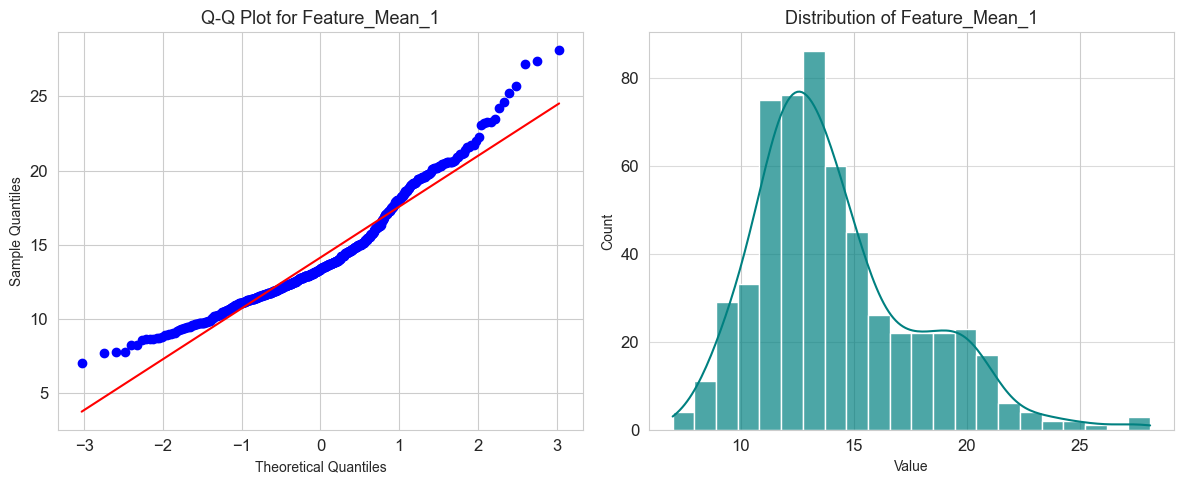

Normality Evaluation for Feature_Mean_1:
  Shapiro-Wilk Test Results: Statistic = 0.9411, p-value = 0.00000000
  Conclusion: The data significantly departs from a normal distribution (p < 0.05).
  Distribution Skewness: 0.9399
    Interpretation: Exhibits a noticeable positive (right) skew, with a tail extending to higher values.
  Distribution Kurtosis: 0.8276
    Interpretation: The distribution is leptokurtic (possesses fatter tails and a sharper peak), suggesting more extreme values than a normal distribution.




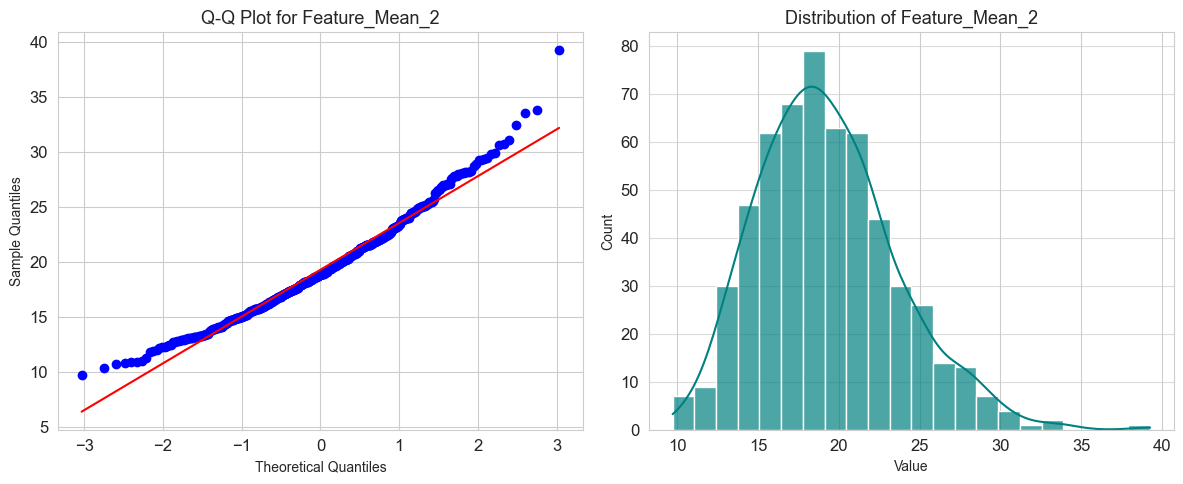

Normality Evaluation for Feature_Mean_2:
  Shapiro-Wilk Test Results: Statistic = 0.9767, p-value = 0.00000007
  Conclusion: The data significantly departs from a normal distribution (p < 0.05).
  Distribution Skewness: 0.6487
    Interpretation: Exhibits a noticeable positive (right) skew, with a tail extending to higher values.
  Distribution Kurtosis: 0.7411
    Interpretation: The distribution is leptokurtic (possesses fatter tails and a sharper peak), suggesting more extreme values than a normal distribution.




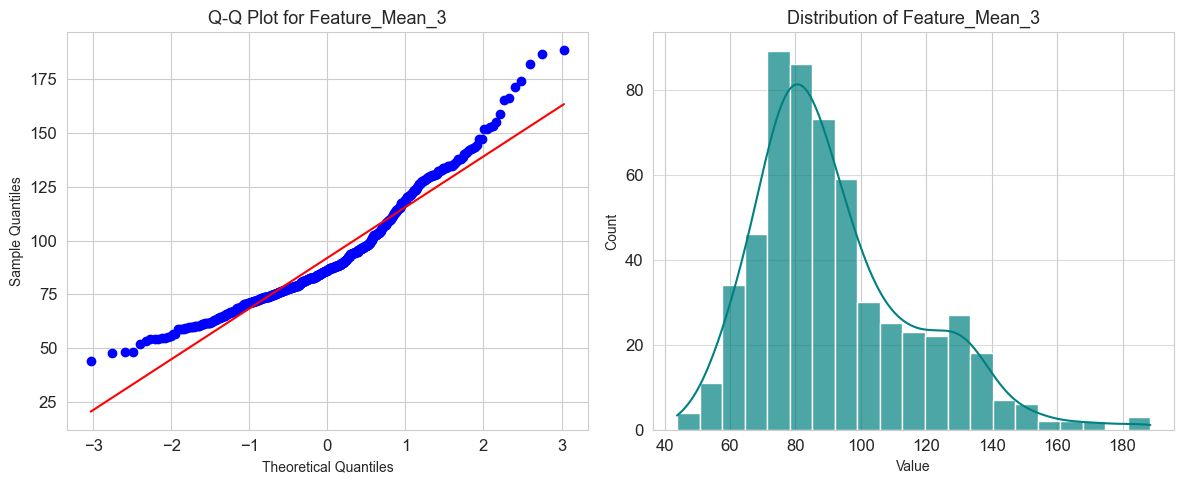

Normality Evaluation for Feature_Mean_3:
  Shapiro-Wilk Test Results: Statistic = 0.9362, p-value = 0.00000000
  Conclusion: The data significantly departs from a normal distribution (p < 0.05).
  Distribution Skewness: 0.9880
    Interpretation: Exhibits a noticeable positive (right) skew, with a tail extending to higher values.
  Distribution Kurtosis: 0.9532
    Interpretation: The distribution is leptokurtic (possesses fatter tails and a sharper peak), suggesting more extreme values than a normal distribution.




In [14]:
# Function to evaluate feature distribution for normality using visual and statistical tests
def evaluate_feature_normality(input_dataframe, feature_column):
    """Assesses if a specified column's data approximates a normal distribution via Q-Q plots and the Shapiro-Wilk test."""
    feature_values_cleaned = input_dataframe[feature_column].dropna() # Remove missing values

    if feature_values_cleaned.empty:
        print(f"Warning: No non-null data for {feature_column}. Skipping normality assessment.")
        return
    if len(feature_values_cleaned) < 3: # Shapiro-Wilk requires at least 3 data points
        print(f"Warning: Insufficient data points ({len(feature_values_cleaned)}) for {feature_column} for Shapiro-Wilk test. Skipping.")
        return

    # Visual diagnostics: Quantile-Quantile Plot and Histogram
    plotting.figure(figsize=(12, 5))

    plotting.subplot(1, 2, 1)
    stats.probplot(feature_values_cleaned, dist="norm", plot=plotting)
    plotting.title(f'Q-Q Plot for {feature_column}', fontsize=13)
    plotting.xlabel('Theoretical Quantiles', fontsize=10)
    plotting.ylabel('Sample Quantiles', fontsize=10)

    plotting.subplot(1, 2, 2)
    enhanced_plotting.histplot(feature_values_cleaned, kde=True, color='teal', alpha=0.7)
    plotting.title(f'Distribution of {feature_column}', fontsize=13)
    plotting.xlabel('Value', fontsize=10)
    plotting.ylabel('Count', fontsize=10)
    plotting.grid(axis='y', alpha=0.7)

    plotting.tight_layout()
    plotting.show()

    # Statistical test for normality: Shapiro-Wilk
    shapiro_test_statistic, shapiro_p_val = stats.shapiro(feature_values_cleaned)

    print(f"Normality Evaluation for {feature_column}:")
    print(f"  Shapiro-Wilk Test Results: Statistic = {shapiro_test_statistic:.4f}, p-value = {shapiro_p_val:.8f}")

    if shapiro_p_val < 0.05:
        print("  Conclusion: The data significantly departs from a normal distribution (p < 0.05).")
    else:
        print("  Conclusion: The data distribution appears consistent with normality (p >= 0.05).")

    # Skewness and Kurtosis for further distribution insights
    computed_skewness = stats.skew(feature_values_cleaned)
    computed_kurtosis = stats.kurtosis(feature_values_cleaned)

    print(f"  Distribution Skewness: {computed_skewness:.4f}")
    if numerical_ops.abs(computed_skewness) < 0.5:
        print("    Interpretation: The distribution is approximately symmetric.")
    elif computed_skewness > 0.5:
        print("    Interpretation: Exhibits a noticeable positive (right) skew, with a tail extending to higher values.")
    else:
        print("    Interpretation: Shows a noticeable negative (left) skew, with a tail extending to lower values.")

    print(f"  Distribution Kurtosis: {computed_kurtosis:.4f}")
    if numerical_ops.abs(computed_kurtosis) < 0.5:
        print("    Interpretation: The distribution's tail characteristics are similar to a normal distribution (mesokurtic).")
    elif computed_kurtosis > 0.5:
        print("    Interpretation: The distribution is leptokurtic (possesses fatter tails and a sharper peak), suggesting more extreme values than a normal distribution.")
    else:
        print("    Interpretation: The distribution is platykurtic (has thinner tails and a flatter peak), implying fewer extreme values than a normal distribution.")
    print("\n" + "="*70 + "\n")

# Apply normality evaluation for a subset of primary numerical features
for attr in primary_numeric_features[:3]: # Limiting to first 3 for brevity
    evaluate_feature_normality(health_data_df, attr)

Outlier Analysis for Feature_Mean_1:
  Total number of extreme values identified: 14
  Percentage of observations considered extreme: 2.46%
  Calculated extreme value thresholds: Lower Threshold = 5.5800, Upper Threshold = 21.9000
  Specific outlier data points:
[25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]


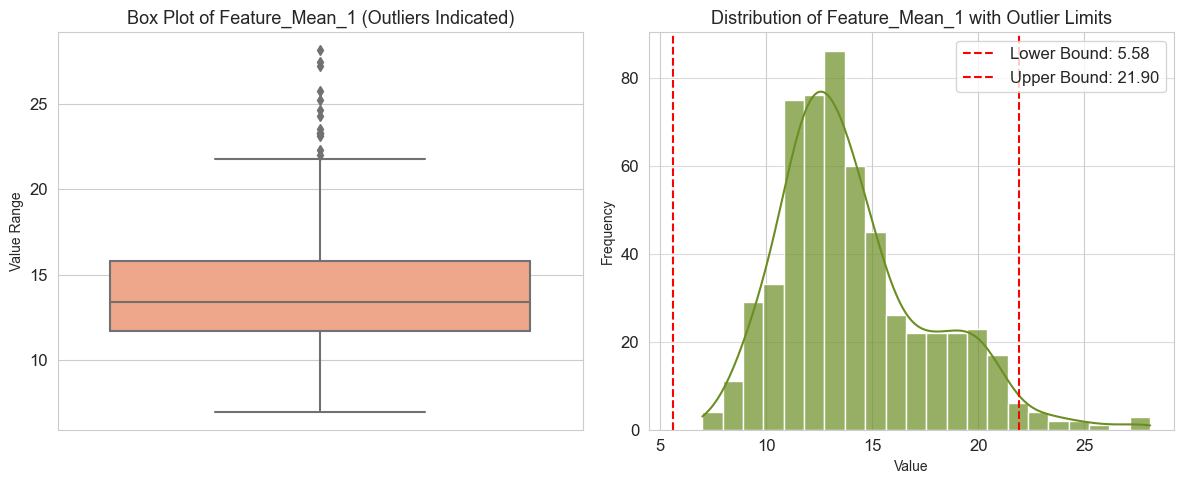


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_2:
  Total number of extreme values identified: 7
  Percentage of observations considered extreme: 1.23%
  Calculated extreme value thresholds: Lower Threshold = 7.7250, Upper Threshold = 30.2450
  Specific outlier data points:
[32.47 33.81 39.28 33.56 31.12 30.72 30.62]


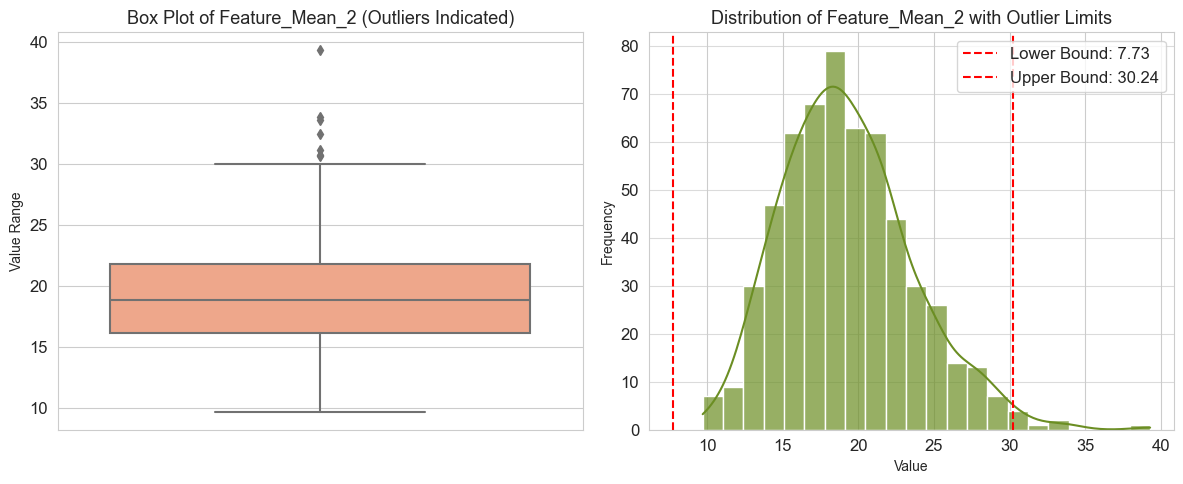


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_3:
  Total number of extreme values identified: 13
  Percentage of observations considered extreme: 2.28%
  Calculated extreme value thresholds: Lower Threshold = 31.7750, Upper Threshold = 147.4950
  Specific outlier data points:
[171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


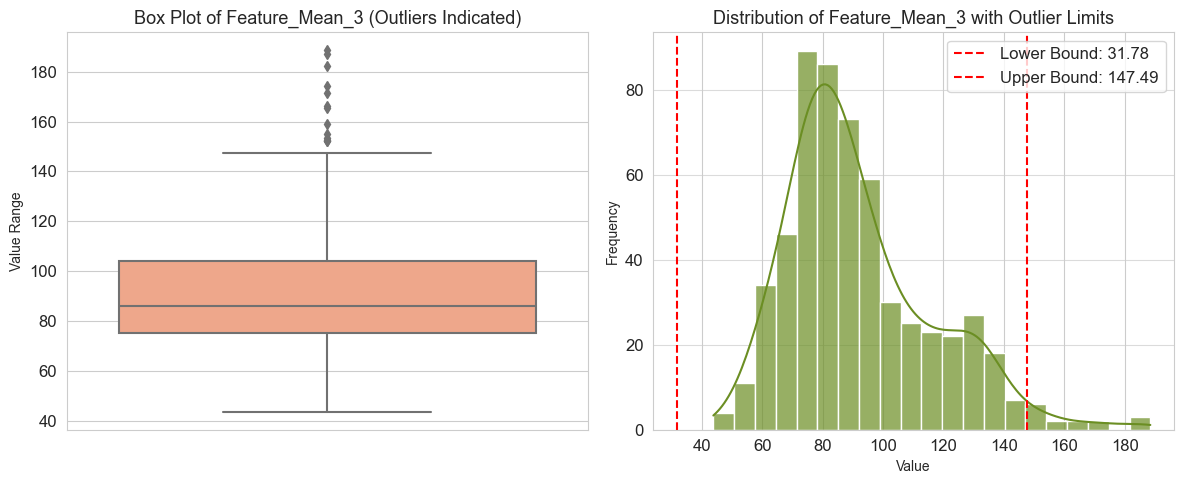


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_4:
  Total number of extreme values identified: 25
  Percentage of observations considered extreme: 4.39%
  Calculated extreme value thresholds: Lower Threshold = -123.3000, Upper Threshold = 1326.3000
  Specific outlier data points:
[1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]


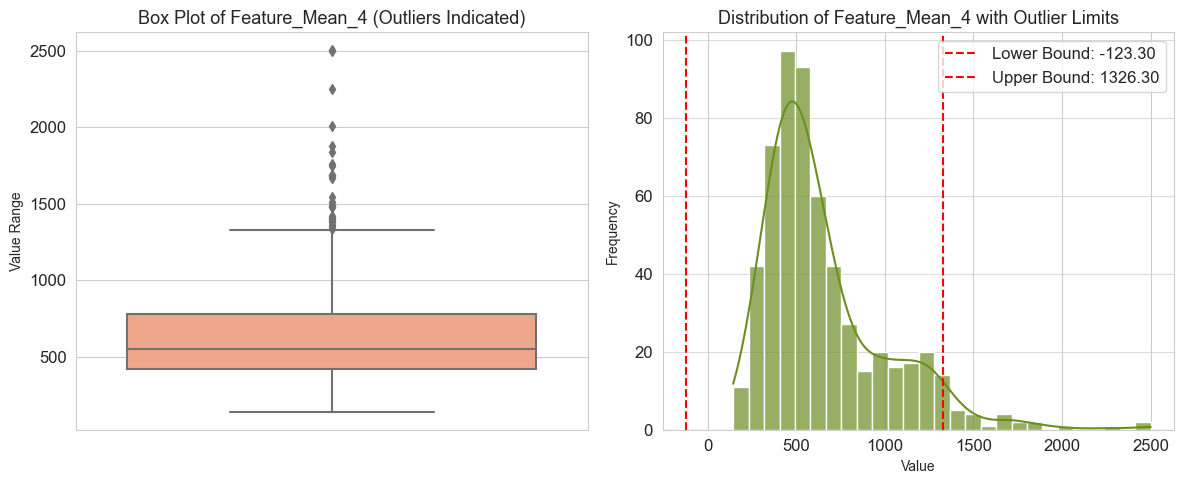


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_5:
  Total number of extreme values identified: 6
  Percentage of observations considered extreme: 1.05%
  Calculated extreme value thresholds: Lower Threshold = 0.0580, Upper Threshold = 0.1337
  Specific outlier data points:
[0.1425  0.1398  0.1447  0.1634  0.1371  0.05263]


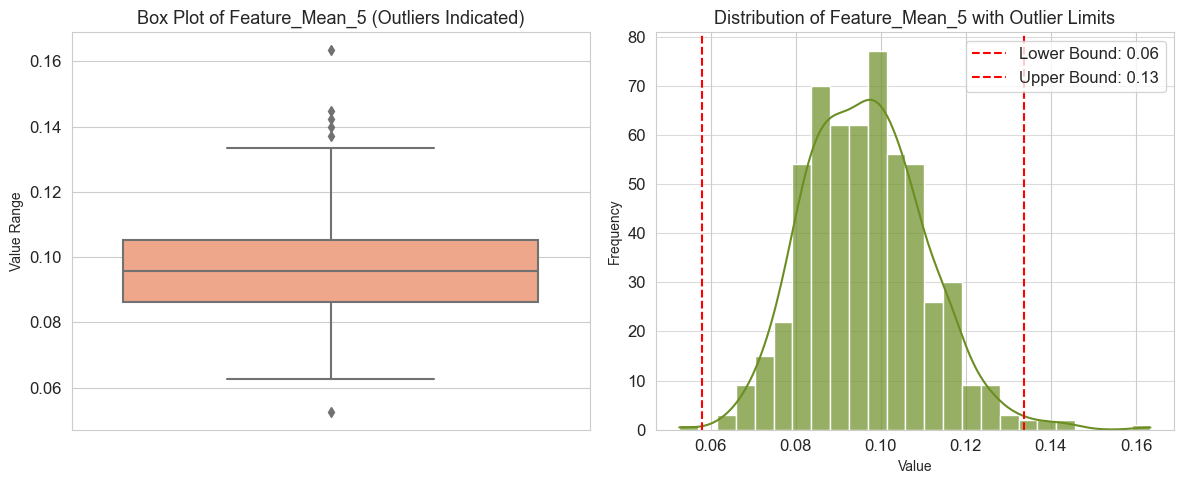


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_6:
  Total number of extreme values identified: 16
  Percentage of observations considered extreme: 2.81%
  Calculated extreme value thresholds: Lower Threshold = -0.0333, Upper Threshold = 0.2286
  Specific outlier data points:
[0.2776 0.2839 0.2396 0.2458 0.2293 0.3454 0.2665 0.2768 0.2867 0.2832
 0.2413 0.3114 0.2364 0.2363 0.2576 0.277 ]


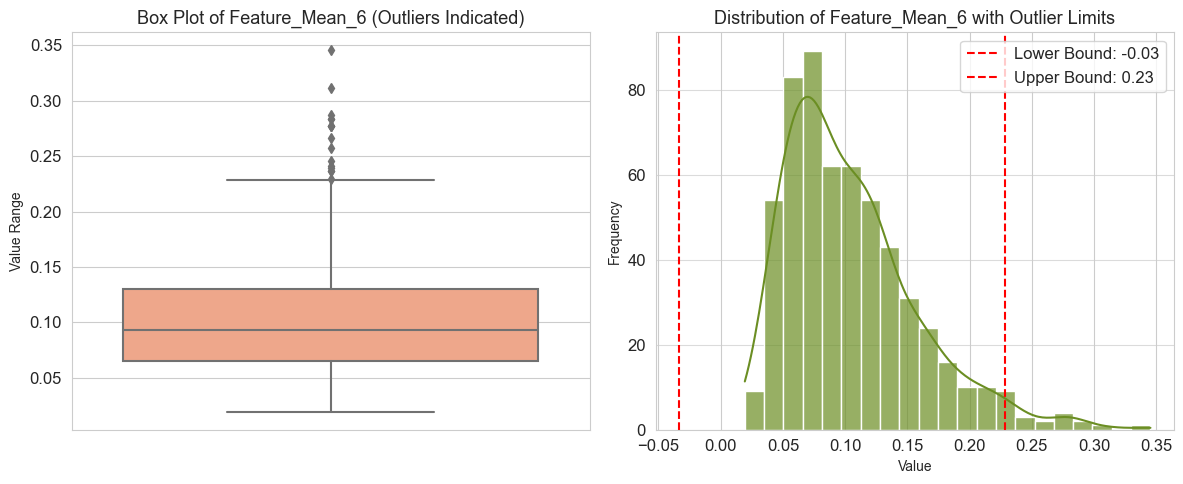


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_7:
  Total number of extreme values identified: 18
  Percentage of observations considered extreme: 3.16%
  Calculated extreme value thresholds: Lower Threshold = -0.1222, Upper Threshold = 0.2824
  Specific outlier data points:
[0.3001 0.313  0.3754 0.3339 0.4264 0.3003 0.4268 0.4108 0.2871 0.3523
 0.3201 0.3176 0.2914 0.3368 0.3189 0.3635 0.3174 0.3514]


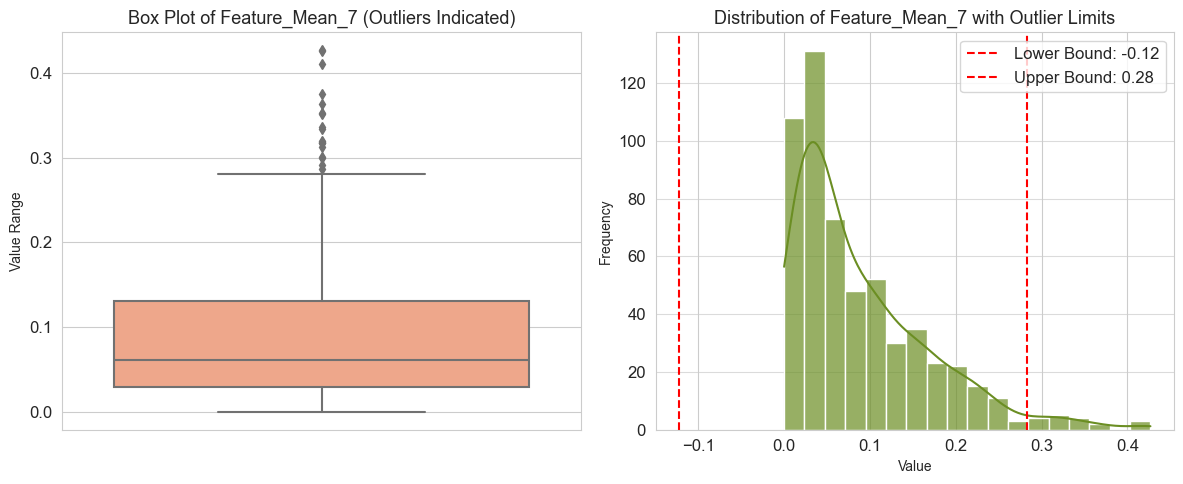


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_8:
  Total number of extreme values identified: 10
  Percentage of observations considered extreme: 1.76%
  Calculated extreme value thresholds: Lower Threshold = -0.0602, Upper Threshold = 0.1545
  Specific outlier data points:
[0.1604 0.1845 0.1823 0.2012 0.1878 0.162  0.1595 0.1913 0.1562 0.1689]


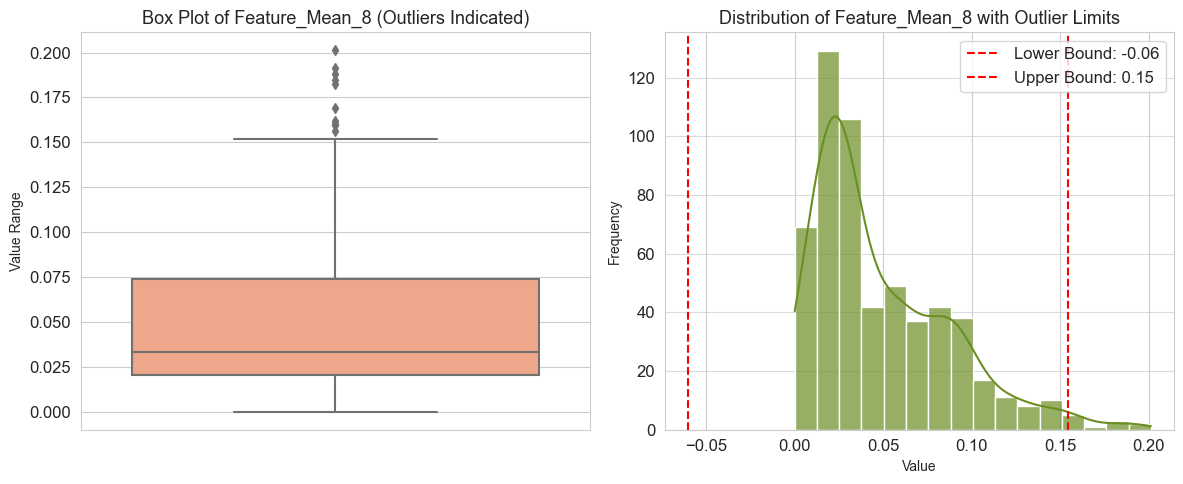


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_9:
  Total number of extreme values identified: 15
  Percentage of observations considered extreme: 2.64%
  Calculated extreme value thresholds: Lower Threshold = 0.1112, Upper Threshold = 0.2464
  Specific outlier data points:
[0.2597 0.2521 0.304  0.2743 0.2906 0.2556 0.2655 0.2678 0.254  0.2548
 0.2495 0.2595 0.2569 0.2538 0.106 ]


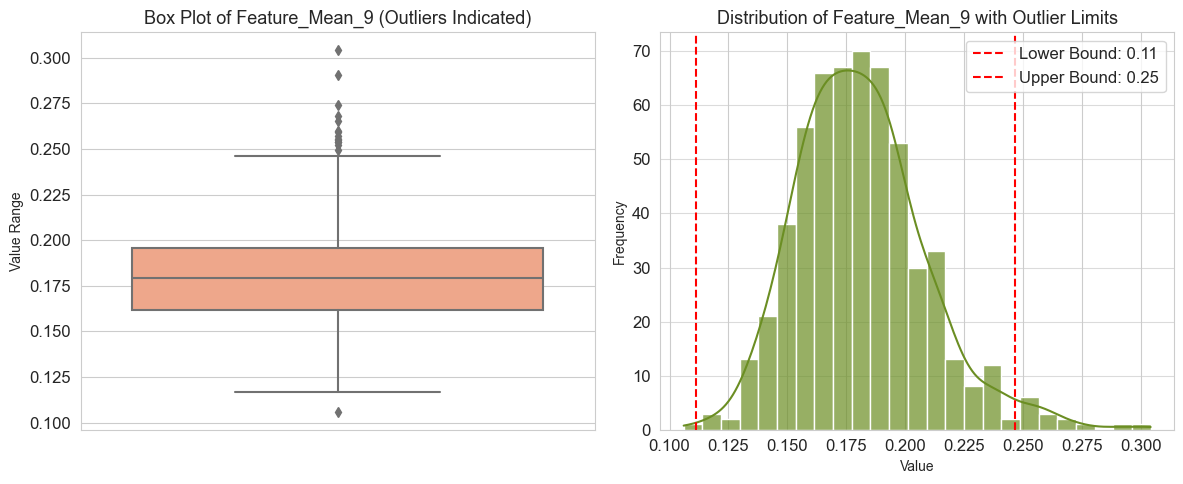


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.

Outlier Analysis for Feature_Mean_10:
  Total number of extreme values identified: 15
  Percentage of observations considered extreme: 2.64%
  Calculated extreme value thresholds: Lower Threshold = 0.0451, Upper Threshold = 0.0787
  Specific outlier data points:
[0.09744 0.08243 0.08046 0.0898  0.08142 0.08261 0.09296 0.08116 0.08104
 0.08743 0.0845  0.0795  0.09502 0.09575 0.07976]


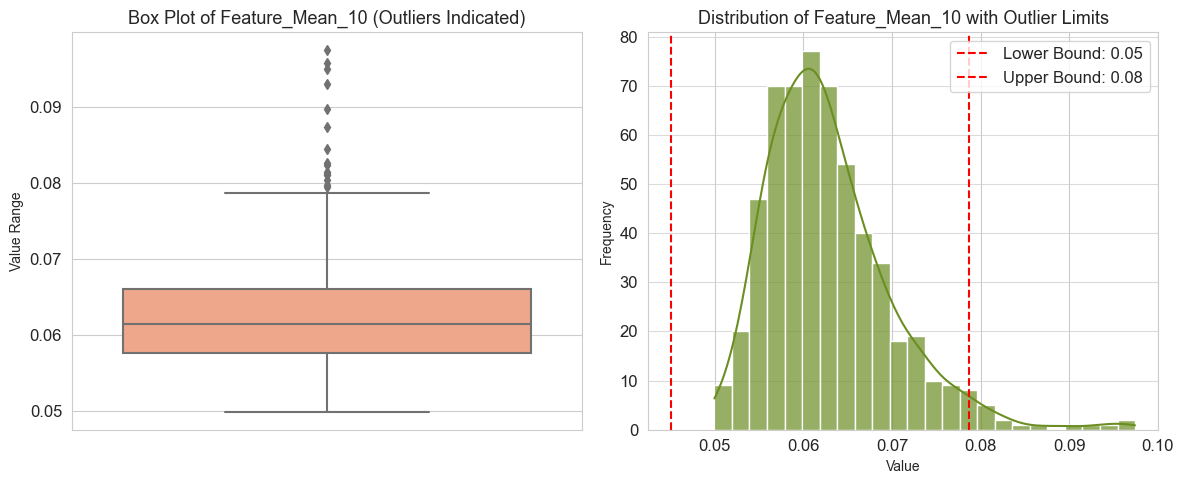


Interpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.



In [15]:
# Function to identify and visualize outliers using the Interquartile Range (IQR) method
def detect_and_visualize_outliers(df_source, target_feature):
    """Identifies and graphically represents outliers in a feature using the IQR approach."""
    feature_observations = df_source[target_feature].dropna() # Filter out missing data

    if feature_observations.empty:
        print(f"Warning: No valid data for {target_feature} after cleaning. Skipping outlier detection.")
        return

    # Calculate Q1, Q3, and IQR
    q1_val = feature_observations.quantile(0.25)
    q3_val = feature_observations.quantile(0.75)
    iqr_calc = q3_val - q1_val

    # Define thresholds for outlier detection (1.5 * IQR rule)
    lower_bound_outlier = q1_val - 1.5 * iqr_calc
    upper_bound_outlier = q3_val + 1.5 * iqr_calc

    # Identify values outside the defined boundaries
    detected_outliers = feature_observations[(feature_observations < lower_bound_outlier) | (feature_observations > upper_bound_outlier)]

    print(f"Outlier Analysis for {target_feature}:")
    print(f"  Total number of extreme values identified: {len(detected_outliers)}")
    if not feature_observations.empty: # Avoid division by zero if all data was dropped
        print(f"  Percentage of observations considered extreme: {(len(detected_outliers) / len(feature_observations)) * 100:.2f}%")
    else:
        print("  Percentage of observations considered extreme: N/A (no observations to analyze)")
    print(f"  Calculated extreme value thresholds: Lower Threshold = {lower_bound_outlier:.4f}, Upper Threshold = {upper_bound_outlier:.4f}")

    if len(detected_outliers) > 0:
        print("  Specific outlier data points:")
        print(detected_outliers.values)

    # Visualize outlier presence using a box plot and a histogram with boundary markers
    plotting.figure(figsize=(12, 5))

    plotting.subplot(1, 2, 1) # Box plot for visual identification of outliers
    enhanced_plotting.boxplot(y=feature_observations, color='lightsalmon')
    plotting.title(f'Box Plot of {target_feature} (Outliers Indicated)', fontsize=13)
    plotting.ylabel('Value Range', fontsize=10)

    plotting.subplot(1, 2, 2) # Histogram illustrating data distribution and outlier cut-offs
    enhanced_plotting.histplot(feature_observations, kde=True, color='olivedrab', alpha=0.7)
    plotting.axvline(lower_bound_outlier, color='red', linestyle='--', label=f'Lower Bound: {lower_bound_outlier:.2f}')
    plotting.axvline(upper_bound_outlier, color='red', linestyle='--', label=f'Upper Bound: {upper_bound_outlier:.2f}')
    plotting.title(f'Distribution of {target_feature} with Outlier Limits', fontsize=13)
    plotting.xlabel('Value', fontsize=10)
    plotting.ylabel('Frequency', fontsize=10)
    plotting.legend()
    plotting.grid(axis='y', alpha=0.7)

    plotting.tight_layout()
    plotting.show()

    print("\nInterpretation: Outliers represent data points that significantly diverge from the majority of observations. These values can sometimes indicate data entry errors, measurement inconsistencies, or genuinely rare extreme events within the dataset. The approach to handling outliers—whether through removal, transformation, or specialized modeling—is context-dependent and should be decided based on their potential impact on the overall analysis and subsequent inferential or predictive tasks.\n" + "="*70 + "\n")

    return detected_outliers

# Apply outlier detection across all primary numerical features
for feat_col in primary_numeric_features:
    feature_outlier_list = detect_and_visualize_outliers(health_data_df, feat_col)

## Concluding Remarks

This in-depth statistical analysis and data visualization notebook has thoroughly explored the Wisconsin Breast Cancer Diagnostic dataset. We systematically investigated measures of central tendency, quantified data dispersion, and visualized complex relationships between features, with a particular focus on distinguishing between benign and malignant diagnoses. The comprehensive understanding of these foundational statistical properties and visual patterns is indispensable for subsequent phases of machine learning, such as strategic feature selection, robust model development, and effective interpretation of predictive outcomes.